# Review of Experimental Results for L8

In [1]:
import numpy as np
import pandas as pd
import math
import joblib
import optuna
from os import path
import matplotlib.pyplot as plt
from ESN import ESN as esn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from scipy.interpolate import make_interp_spline
import time

In [2]:
df = pd.read_excel('Architecture.xlsx').iloc[:,0]

 
studies = pd.DataFrame([
    ["study_1469", joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_trials], 
    ["study_146A", joblib.load('L8-experiment-' + str(df[1]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[1]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[1]) + ".pkl").best_trials], 
    ["study_146B", joblib.load('L8-experiment-' + str(df[2]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[2]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[2]) + ".pkl").best_trials], 
    ["study_1479", joblib.load('L8-experiment-' + str(df[3]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[3]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[3]) + ".pkl").best_trials], 
    ["study_147A", joblib.load('L8-experiment-' + str(df[4]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[4]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[4]) + ".pkl").best_trials], 
    ["study_147B", joblib.load('L8-experiment-' + str(df[5]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[5]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[5]) + ".pkl").best_trials], 
    ["study_1569", joblib.load('L8-experiment-' + str(df[6]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[6]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[6]) + ".pkl").best_trials], 
    ["study_156A", joblib.load('L8-experiment-' + str(df[7]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[7]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[7]) + ".pkl").best_trials], 
    ["study_156B", joblib.load('L8-experiment-' + str(df[8]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[8]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[8]) + ".pkl").best_trials], 
    ["study_1579", joblib.load('L8-experiment-' + str(df[9]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[9]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[9]) + ".pkl").best_trials], 
    ["study_157A", joblib.load('L8-experiment-' + str(df[10]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[10]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[10]) + ".pkl").best_trials],
    ["study_157B", joblib.load('L8-experiment-' + str(df[11]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[11]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[11]) + ".pkl").best_trials],
    ["study_2469", joblib.load('L8-experiment-' + str(df[12]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[12]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[12]) + ".pkl").best_trials],
    ["study_246A", joblib.load('L8-experiment-' + str(df[13]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[13]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[13]) + ".pkl").best_trials],
    ["study_246B", joblib.load('L8-experiment-' + str(df[14]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[14]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[14]) + ".pkl").best_trials],
    ["study_2479", joblib.load('L8-experiment-' + str(df[15]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[15]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[15]) + ".pkl").best_trials],
    ["study_247A", joblib.load('L8-experiment-' + str(df[16]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[16]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[16]) + ".pkl").best_trials],
    ["study_247B", joblib.load('L8-experiment-' + str(df[17]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[17]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[17]) + ".pkl").best_trials],
    ["study_2569", joblib.load('L8-experiment-' + str(df[18]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[18]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[18]) + ".pkl").best_trials],
    ["study_256A", joblib.load('L8-experiment-' + str(df[19]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[19]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[19]) + ".pkl").best_trials],
    ["study_256B", joblib.load('L8-experiment-' + str(df[20]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[20]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[20]) + ".pkl").best_trials],
    ["study_2579", joblib.load('L8-experiment-' + str(df[21]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[21]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[21]) + ".pkl").best_trials],
    ["study_257A", joblib.load('L8-experiment-' + str(df[22]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[22]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[22]) + ".pkl").best_trials],
    ["study_257B", joblib.load('L8-experiment-' + str(df[23]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[23]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[23]) + ".pkl").best_trials],
    ["study_3469", joblib.load('L8-experiment-' + str(df[24]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[24]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[24]) + ".pkl").best_trials],
    ["study_346A", joblib.load('L8-experiment-' + str(df[25]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[25]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[25]) + ".pkl").best_trials],
    ["study_346B", joblib.load('L8-experiment-' + str(df[26]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[26]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[26]) + ".pkl").best_trials],
    ["study_3479", joblib.load('L8-experiment-' + str(df[27]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[27]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[27]) + ".pkl").best_trials],
    ["study_347A", joblib.load('L8-experiment-' + str(df[28]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[28]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[28]) + ".pkl").best_trials],
    ["study_347B", joblib.load('L8-experiment-' + str(df[29]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[29]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[29]) + ".pkl").best_trials],
    ["study_3569", joblib.load('L8-experiment-' + str(df[30]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[30]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[30]) + ".pkl").best_trials],
    ["study_356A", joblib.load('L8-experiment-' + str(df[31]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[31]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[31]) + ".pkl").best_trials],
    ["study_356B", joblib.load('L8-experiment-' + str(df[32]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[32]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[32]) + ".pkl").best_trials],
    ["study_3579", joblib.load('L8-experiment-' + str(df[33]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[33]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[33]) + ".pkl").best_trials],
    ["study_357A", joblib.load('L8-experiment-' + str(df[34]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[34]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[34]) + ".pkl").best_trials],
    ["study_357B", joblib.load('L8-experiment-' + str(df[35]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[35]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[35]) + ".pkl").best_trials],
    ["study_8469", joblib.load('L8-experiment-' + str(df[36]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[36]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[36]) + ".pkl").best_trials],
    ["study_846A", joblib.load('L8-experiment-' + str(df[37]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[37]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[37]) + ".pkl").best_trials],
    ["study_846B", joblib.load('L8-experiment-' + str(df[38]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[38]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[38]) + ".pkl").best_trials],
    ["study_8479", joblib.load('L8-experiment-' + str(df[39]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[39]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[39]) + ".pkl").best_trials],
    ["study_847A", joblib.load('L8-experiment-' + str(df[40]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[40]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[40]) + ".pkl").best_trials],
    ["study_847B", joblib.load('L8-experiment-' + str(df[41]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[41]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[41]) + ".pkl").best_trials],
    ["study_8569", joblib.load('L8-experiment-' + str(df[42]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[42]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[42]) + ".pkl").best_trials],
    ["study_856A", joblib.load('L8-experiment-' + str(df[43]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[43]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[43]) + ".pkl").best_trials],
    ["study_856B", joblib.load('L8-experiment-' + str(df[44]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[44]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[44]) + ".pkl").best_trials],
    ["study_8579", joblib.load('L8-experiment-' + str(df[45]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[45]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[45]) + ".pkl").best_trials],
    ["study_857A", joblib.load('L8-experiment-' + str(df[46]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[46]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[46]) + ".pkl").best_trials],
    ["study_857B", joblib.load('L8-experiment-' + str(df[47]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[47]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[47]) + ".pkl").best_trials]])



In [3]:
studies = studies.sort_values(by=1)
studies.head(20)

0         1                                                  2  \
37  study_846A  0.004191  FrozenTrial(number=141, values=[0.004191230615...   
38  study_846B  0.005588  FrozenTrial(number=128, values=[0.005588089084...   
36  study_8469  0.008238  FrozenTrial(number=25, values=[0.0082383903083...   
42  study_8569  0.012276  FrozenTrial(number=93, values=[0.0122762255717...   
14  study_246B  0.017163  FrozenTrial(number=102, values=[0.017163399667...   
12  study_2469  0.019827  FrozenTrial(number=113, values=[0.019826640045...   
26  study_346B  0.020326  FrozenTrial(number=113, values=[0.020325603184...   
44  study_856B  0.035287  FrozenTrial(number=72, values=[0.0352869710919...   
24  study_3469  0.036803  FrozenTrial(number=85, values=[0.0368026392418...   
25  study_346A  0.050963  FrozenTrial(number=17, values=[0.0509632412787...   
2   study_146B  0.071117  FrozenTrial(number=90, values=[0.0711167657531...   
0   study_1469  0.086602  FrozenTrial(number=148, values=[0.086601716213...   
20  study_256B  0.138946  FrozenTrial(number=146, values=[0.138946053871...   
43  study_856A  0.485704  FrozenTrial(number=18, values=[0.4857041334549...   
19  study_256A  0.506749  FrozenTrial(number=110, values=[0.506748744576...   
3   study_1479  0.551106  FrozenTrial(number=111, values=[0.551105761798...   
4   study_147A  0.646882  FrozenTrial(number=141, values=[0.646881690763...   
6   study_1569  0.685677  FrozenTrial(number=47, values=[0.6856771677661...   
9   study_1579  0.706518  FrozenTrial(number=142, values=[0.706517926660...   
32  study_356B  0.706612  FrozenTrial(number=131, values=[0.706612234087...   

                                                    3  
37  [FrozenTrial(number=141, values=[0.00419123061...  
38  [FrozenTrial(number=128, values=[0.00558808908...  
36  [FrozenTrial(number=25, values=[0.008238390308...  
42  [FrozenTrial(number=93, values=[0.012276225571...  
14  [FrozenTrial(number=102, values=[0.01716339966...  
12  [FrozenTrial(number=113, values=[0.01982664004...  
26  [FrozenTrial(number=113, values=[0.02032560318...  
44  [FrozenTrial(number=72, values=[0.035286971091...  
24  [FrozenTrial(number=85, values=[0.036802639241...  
25  [FrozenTrial(number=17, values=[0.050963241278...  
2   [FrozenTrial(number=90, values=[0.071116765753...  
0   [FrozenTrial(number=148, values=[0.08660171621...  
20  [FrozenTrial(number=146, values=[0.13894605387...  
43  [FrozenTrial(number=18, values=[0.485704133454...  
19  [FrozenTrial(number=110, values=[0.50674874457...  
3   [FrozenTrial(number=111, values=[0.55110576179...  
4   [FrozenTrial(number=141, values=[0.64688169076...  
6   [FrozenTrial(number=47, values=[0.685677167766...  
9   [FrozenTrial(number=142, values=[0.70651792666...  
32  [FrozenTrial(number=131, values=[0.70661223408...

## Confirm Trial Results
Make sure the above results can be duplicated

In [4]:
def getScores(actual, predicted): 
    np.seterr(all='raise')
    try:
        mse0 = mse(actual, predicted)
        rmse = math.sqrt(mse0)
        
        mae0 = mae(actual, predicted)
        
        r20 = r2(actual, predicted)
        
    except FloatingPointError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (1)')
        rmse = 100
        mae0 = 100
        r20 = 0
        
    except ValueError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (3)')
        rmse = 100
        mae0 = 100
        r20 = 0

    np.seterr(all='warn')
    return rmse, mae0, r20

#### Generate Data

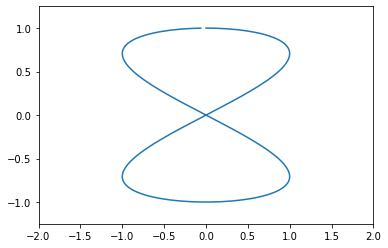

In [654]:
#Generate Figure 8 Data
t_all = np.linspace(0, 2*(23000/200), 23000)
t = t_all[0:3000]
t_val = t_all[3000:]
omega = 1

x = np.sin(2*math.pi*omega*t)
x = x.reshape(-1,1)
x_val = np.sin(2*math.pi*omega*t_val)
x_val = x_val.reshape(-1,1)

y = np.cos(math.pi*omega*t)
y = y.reshape(-1,1)
y_val = np.cos(math.pi*omega*t_val)
y_val = y_val.reshape(-1,1)

plt.plot(x[0:200], y[0:200])
plt.ylim(-1.25, 1.25)
plt.xlim(-2,2)
plt.show()

data = np.column_stack((x,y))
dataval = np.column_stack((x_val,y_val))

#### Trial vs Recreated

In [6]:
# Parameters (to tune)
#N = trial.suggest_int('N', 10,100) For Jaeger et al's work we know 20 neurons was sufficient and we can always scale up
np.random.seed(0)
K = 0
L = 2
N = 20
v = np.random.uniform(-0.01,0.01,(20000, 20))
sv = 0
outAlg = 1 
isBias = True
isClassification = False

for i in range(0,10):
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    washout = 1000
    model.sv = 0
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = None, teacher=data, washout=washout)
    model.sv = 1
    predicted = model.run(input_u=None, time=20000,washout=1000)

    nrmse0, mae0, r20 = getScores(dataval[1000:], predicted)
    print(studies.iloc[i,0])
    print("RMSE: " + str(studies.iloc[i,2].user_attrs['rmse']) + ", " + str(nrmse0))
    print("MAE: " + str(studies.iloc[i,2].user_attrs['MAE']) + ", " + str(mae0))
    print("R2: " + str(studies.iloc[i,2].user_attrs['R2']) + ", " + str(r20) + "\n")

study_846A
RMSE: 0.004191230615890987, 0.004191230615890987
MAE: 0.0030785908795193826, 0.0030785908795193826
R2: 0.9999648665069779, 0.9999648665069779

study_846B
RMSE: 0.005588089084474876, 0.005588089084474876
MAE: 0.004100724696392172, 0.004100724696392172
R2: 0.9999375450377477, 0.9999375450377477

study_8469
RMSE: 0.008238390308307987, 0.008238390308307987
MAE: 0.006258535889677789, 0.006258535889677789
R2: 0.9998642545648319, 0.9998642545648319

study_8569
RMSE: 0.012276225571786606, 0.012276225571786606
MAE: 0.009157463987064072, 0.009157463987064072
R2: 0.9996985809201915, 0.9996985809201915

study_246B
RMSE: 0.01716339966789869, 0.01716339966789869
MAE: 0.012867009388312112, 0.012867009388312112
R2: 0.9994108219287874, 0.9994108219287874

study_2469
RMSE: 0.01982664004581986, 0.01982664004581986
MAE: 0.01436529472785487, 0.01436529472785487
R2: 0.999213784811342, 0.999213784811342

study_346B
RMSE: 0.020325603184915338, 0.020325603184915338
MAE: 0.01522953611814399, 0.015229

# Questions to Answer:
### How Does Model Accuracy Change as We Increase the Number of Neurons, N?
### Which reservoir activation function is the best?
### Is there an overwhelming difference in how the distribution type changes the model?
### Which connections within the reservoir give the best setup for this pattern generation task?
### None of the models which ranked well used a tanh output activation: discuss.

# How Does Model Accuracy Change as We Increase the Number of Neurons, N?

In [8]:
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,551,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
scores = np.zeros((15,2))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,29):
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)
            
            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

Exceptionally bad generation of ESN. Aborting sub-trial. (1)
Exceptionally bad generation of ESN. Aborting sub-trial. (1)


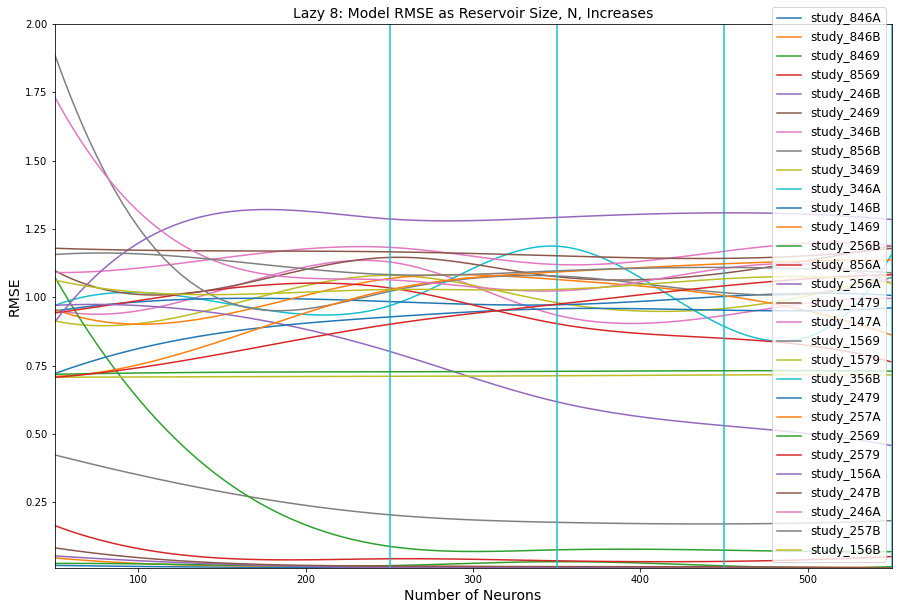

In [9]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,550])
plt.ylim([0.01,2])
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Number of Neurons', fontsize=14)
plt.title('Lazy 8: Model RMSE as Reservoir Size, N, Increases', fontsize=14)
plt.show()

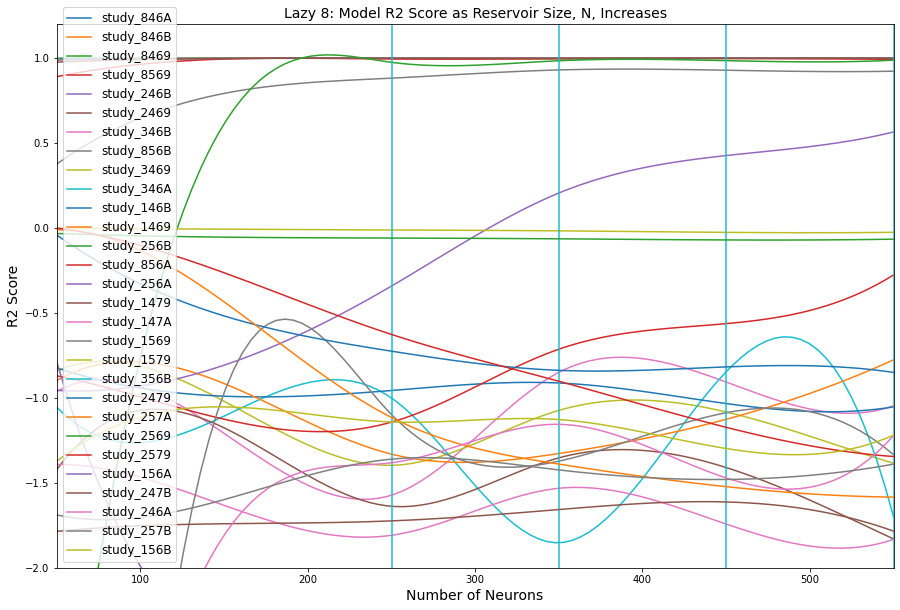

In [10]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo30.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,550])
plt.ylim([-2.0,1.2])
plt.ylabel('R2 Score', fontsize=14)
plt.xlabel('Number of Neurons', fontsize=14)
plt.title('Lazy 8: Model R2 Score as Reservoir Size, N, Increases', fontsize=14)
plt.show()

In [11]:
#Cleanup the plot
pd.set_option('display.max_columns', None)
plotInfo3.iloc[:,:]

study_846A  study_846B  study_8469  study_8569  study_246B  study_2469  \
0    0.018887    0.046374    0.025979    0.164767    0.053577    0.083245   
1    0.012426    0.017759    0.019844    0.045116    0.023486    0.027541   
2    0.010491    0.016291    0.018062    0.043058    0.011185    0.016261   
3    0.011000    0.012242    0.032382    0.035640    0.010294    0.014442   
4    0.010287    0.011288    0.017107    0.033518    0.008985    0.013469   
5    0.007206    0.011403    0.014172    0.051290    0.005464    0.008980   

   study_346B  study_856B  study_3469  study_346A  study_146B  study_1469  \
0    0.954722    0.423439    0.914052    0.970134    0.949906    0.956415   
1    1.027527    0.288052    0.965268    0.980508    0.995895    0.935240   
2    1.129794    0.204061    1.080572    0.968929    0.984582    1.068693   
3    0.935131    0.176472    0.980945    1.187471    0.972817    1.065425   
4    0.933817    0.170687    0.959404    0.893657    1.003300    1.006571   
5    0.996117    0.182737    1.085986    1.156718    1.007134    0.862203   

   study_256B  study_856A  study_256A  study_1479  study_147A  study_1569  \
0    1.075646    0.943043    0.970776    1.098256    1.090798    1.891041   
1    0.336567    1.030345    0.939865    1.034561    1.144007    0.990757   
2    0.088580    1.034685    0.802486    1.146263    1.183210    1.021739   
3    0.075703    0.903688    0.617921    1.075600    1.120164    1.078333   
4    0.074487    0.849965    0.530277    1.088727    1.168636    1.017048   
5    0.068940    0.763585    0.457439    1.188525    1.189097    1.073283   

   study_1579     study_356B  study_2479  study_257A  study_2569  study_2579  \
0    0.707764  5.299586e+138    0.720548    0.710720    0.718260    0.707226   
1    0.709401  3.002389e+144    0.870439    0.841194    0.725750    0.793222   
2    0.711122   3.863060e+66    0.928396    1.027810    0.727630    0.901359   
3    0.712909   1.270104e+11    0.958485    1.092934    0.729167    0.974811   
4    0.716010   1.761464e+00    0.953077    1.122971    0.731423    1.042071   
5    0.715920   4.993891e+45    0.961424    1.136621    0.729813    1.082775   

   study_156A  study_247B  study_246A  study_257B  study_156B  
0    0.909495    1.179805    1.735061    1.156757    1.063290  
1    1.309929    1.170162    1.123813    1.135783    1.010214  
2    1.287085    1.166633    1.064000    1.083209    1.028681  
3    1.292627    1.152268    1.023447    1.097010    1.029057  
4    1.309448    1.142753    1.106162    1.109612    1.067913  
5    1.285097    1.179384    1.052085    1.090076    1.052308

In [12]:
plotInfo30.iloc[5,:]

study_846A    9.998735e-01
study_846B    9.996529e-01
study_8469    9.995622e-01
study_8569    9.934654e-01
study_246B    9.999323e-01
study_2469    9.998167e-01
study_346B   -1.046572e+00
study_856B    9.235195e-01
study_3469   -1.384533e+00
study_346A   -1.700103e+00
study_146B   -1.052719e+00
study_1469   -7.757679e-01
study_256B    9.884048e-01
study_856A   -2.761608e-01
study_256A    5.655435e-01
study_1479   -1.830113e+00
study_147A   -1.832533e+00
study_1569   -1.334553e+00
study_1579   -2.509526e-02
study_356B   -6.982602e+92
study_2479   -8.498974e-01
study_257A   -1.583953e+00
study_2569   -6.531158e-02
study_2579   -1.344903e+00
study_156A   -2.305004e+00
study_247B   -1.784067e+00
study_246A   -1.221576e+00
study_257B   -1.389748e+00
study_156B   -1.219491e+00
Name: 5, dtype: float64

In [13]:
#r2Mean = plotInfo30.mean(axis=0)
r2Mean = plotInfo30.iloc[5,:].sort_values(ascending=False)
r2Mean[:9]

study_246B    0.999932
study_846A    0.999874
study_2469    0.999817
study_846B    0.999653
study_8469    0.999562
study_8569    0.993465
study_256B    0.988405
study_856B    0.923519
study_256A    0.565544
Name: 5, dtype: float64

In [14]:
plotInfo3Avg = plotInfo3[[r2Mean.index[0], r2Mean.index[1], r2Mean.index[2], r2Mean.index[3], r2Mean.index[4], r2Mean.index[5], r2Mean.index[6], r2Mean.index[7], r2Mean.index[8]]]
plotInfo3Avg = plotInfo3Avg.mean(axis=0)
plotInfo3Avg = plotInfo3Avg.sort_values()

In [15]:
plotInfo3_10 = plotInfo3[[plotInfo3Avg.index[0], plotInfo3Avg.index[1], plotInfo3Avg.index[2], plotInfo3Avg.index[3], plotInfo3Avg.index[4], plotInfo3Avg.index[5], plotInfo3Avg.index[6], plotInfo3Avg.index[7], plotInfo3Avg.index[8]]]

In [16]:
plotInfo3_10.head(10)

study_846A  study_246B  study_846B  study_8469  study_2469  study_8569  \
0    0.018887    0.053577    0.046374    0.025979    0.083245    0.164767   
1    0.012426    0.023486    0.017759    0.019844    0.027541    0.045116   
2    0.010491    0.011185    0.016291    0.018062    0.016261    0.043058   
3    0.011000    0.010294    0.012242    0.032382    0.014442    0.035640   
4    0.010287    0.008985    0.011288    0.017107    0.013469    0.033518   
5    0.007206    0.005464    0.011403    0.014172    0.008980    0.051290   

   study_856B  study_256B  study_256A  
0    0.423439    1.075646    0.970776  
1    0.288052    0.336567    0.939865  
2    0.204061    0.088580    0.802486  
3    0.176472    0.075703    0.617921  
4    0.170687    0.074487    0.530277  
5    0.182737    0.068940    0.457439

In [17]:
orderedStudies = pd.DataFrame()
for i in plotInfo3Avg.index:
    orderedStudies = pd.concat([orderedStudies, studies.loc[studies.iloc[:,0] == i]])
orderedStudies = orderedStudies.reset_index(drop=True)
orderedStudies.head(10)

0         1                                                  2  \
0  study_846A  0.004191  FrozenTrial(number=141, values=[0.004191230615...   
1  study_246B  0.017163  FrozenTrial(number=102, values=[0.017163399667...   
2  study_846B  0.005588  FrozenTrial(number=128, values=[0.005588089084...   
3  study_8469  0.008238  FrozenTrial(number=25, values=[0.0082383903083...   
4  study_2469  0.019827  FrozenTrial(number=113, values=[0.019826640045...   
5  study_8569  0.012276  FrozenTrial(number=93, values=[0.0122762255717...   
6  study_856B  0.035287  FrozenTrial(number=72, values=[0.0352869710919...   
7  study_256B  0.138946  FrozenTrial(number=146, values=[0.138946053871...   
8  study_256A  0.506749  FrozenTrial(number=110, values=[0.506748744576...   

                                                   3  
0  [FrozenTrial(number=141, values=[0.00419123061...  
1  [FrozenTrial(number=102, values=[0.01716339966...  
2  [FrozenTrial(number=128, values=[0.00558808908...  
3  [FrozenTrial(number=25, values=[0.008238390308...  
4  [FrozenTrial(number=113, values=[0.01982664004...  
5  [FrozenTrial(number=93, values=[0.012276225571...  
6  [FrozenTrial(number=72, values=[0.035286971091...  
7  [FrozenTrial(number=146, values=[0.13894605387...  
8  [FrozenTrial(number=110, values=[0.50674874457...

In [18]:
studies.head(10)

0         1                                                  2  \
37  study_846A  0.004191  FrozenTrial(number=141, values=[0.004191230615...   
38  study_846B  0.005588  FrozenTrial(number=128, values=[0.005588089084...   
36  study_8469  0.008238  FrozenTrial(number=25, values=[0.0082383903083...   
42  study_8569  0.012276  FrozenTrial(number=93, values=[0.0122762255717...   
14  study_246B  0.017163  FrozenTrial(number=102, values=[0.017163399667...   
12  study_2469  0.019827  FrozenTrial(number=113, values=[0.019826640045...   
26  study_346B  0.020326  FrozenTrial(number=113, values=[0.020325603184...   
44  study_856B  0.035287  FrozenTrial(number=72, values=[0.0352869710919...   
24  study_3469  0.036803  FrozenTrial(number=85, values=[0.0368026392418...   
25  study_346A  0.050963  FrozenTrial(number=17, values=[0.0509632412787...   

                                                    3  
37  [FrozenTrial(number=141, values=[0.00419123061...  
38  [FrozenTrial(number=128, values=[0.00558808908...  
36  [FrozenTrial(number=25, values=[0.008238390308...  
42  [FrozenTrial(number=93, values=[0.012276225571...  
14  [FrozenTrial(number=102, values=[0.01716339966...  
12  [FrozenTrial(number=113, values=[0.01982664004...  
26  [FrozenTrial(number=113, values=[0.02032560318...  
44  [FrozenTrial(number=72, values=[0.035286971091...  
24  [FrozenTrial(number=85, values=[0.036802639241...  
25  [FrozenTrial(number=17, values=[0.050963241278...

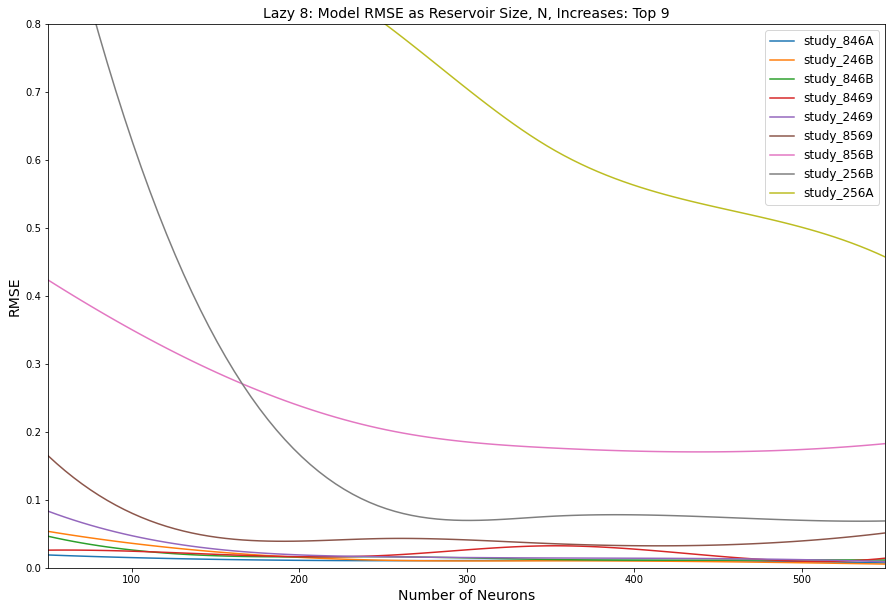

In [19]:
#add to plot
inc = 100
x = np.arange(50,551,inc) #Number of Neurons
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3_10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3_10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3_10.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,550])
plt.ylim([0,0.8])
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Number of Neurons', fontsize=14)
plt.title('Lazy 8: Model RMSE as Reservoir Size, N, Increases: Top 9', fontsize=14)
plt.show()

In [20]:
for i in range (0,9):
    print(orderedStudies.iloc[i,0])
    print(orderedStudies.iloc[i,2].params)
    print("\n")

study_846A
{'p': 0.8501965562812667, 'a': 0.02072373822805785, 'dw': 0.10058738443731437, 'dfb': 0.5938516780838764, 'din': 0.24478433224604743, 'sin': 0.791195465774344, 'sfb': 1.3786047847785634, 'B': 0.002401829829257553}


study_246B
{'p': 0.8971020291754769, 'a': 0.0437681455588981, 'dw': 0.47038679669084155, 'dfb': 0.6651479136661085, 'din': 0.9194688156783356, 'sin': 0.4553272881927348, 'sfb': 1.1389690264717531, 'B': 0.002292524141953427}


study_846B
{'p': 0.47163038219444653, 'a': 0.02125807386630776, 'dw': 0.19588632620935795, 'dfb': 0.7751230270899211, 'din': 0.519357031118256, 'sin': 1.68241425497044, 'sfb': 1.0399287096373628, 'B': 0.004520710422521413}


study_8469
{'p': 0.7155824893181177, 'a': 0.02267689445433657, 'dw': 0.22478813011425094, 'dfb': 0.7980529344168028, 'din': 0.24699826611863257, 'sin': 0.6118689005541654, 'sfb': 1.0399679688403098, 'B': 0.001085709832457361}


study_2469
{'p': 0.9123984349097597, 'a': 0.03586335874356783, 'dw': 0.8042152498945494, 'dfb'

# Time Complexity

In [21]:
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 250
washout = 1000

x = np.arange(50,1550,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
scores = np.zeros((15,2))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,9): #pick a model
    N = 50
    p = orderedStudies.iloc[i,2].params['p']
    a = orderedStudies.iloc[i,2].params['a']
    dw = orderedStudies.iloc[i,2].params['dw']
    dfb = orderedStudies.iloc[i,2].params['dfb']
    din = orderedStudies.iloc[i,2].params['din']
    sin = orderedStudies.iloc[i,2].params['sin']
    sfb = orderedStudies.iloc[i,2].params['sfb']
    B = orderedStudies.iloc[i,2].params['B']
    isU2Y = orderedStudies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = orderedStudies.iloc[i,2].user_attrs['isY2Y']
    resFunc = orderedStudies.iloc[i,2].user_attrs['resFunc']
    outFunc = orderedStudies.iloc[i,2].user_attrs['outFunc']
    distribution = orderedStudies.iloc[i,2].user_attrs['distribution']
    
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)
            
            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[orderedStudies.iloc[i,0]])), axis=1)

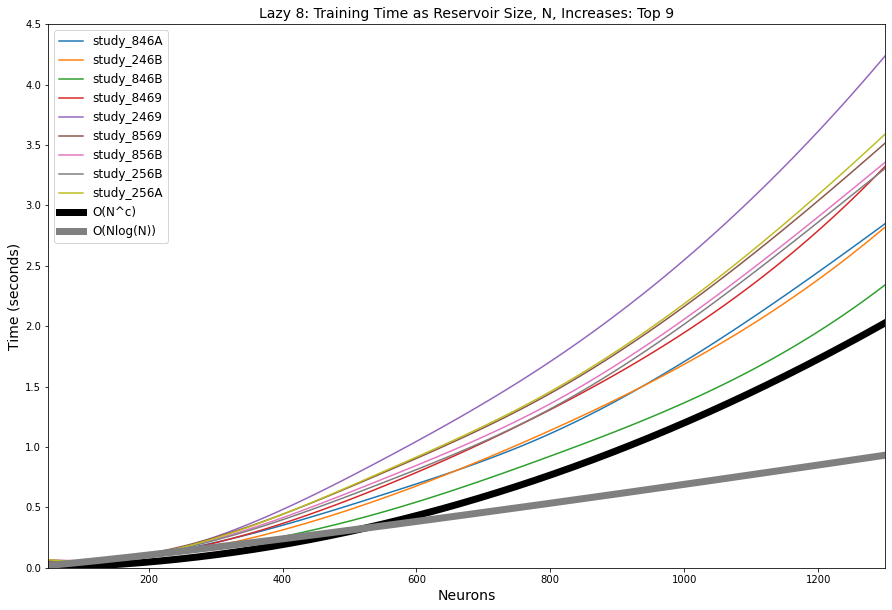

In [22]:
inc = 250
x = np.arange(50,1550,inc) #Number of Neurons
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimeTrain.columns[col])
    
n = np.arange(1,1300)
exponential = 0.0000012*np.power(n,2)
nlogn = 0.0001*n*np.log(n)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)
plt.plot(n,nlogn,label='O(Nlog(N))', color='#808080', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1300])
plt.ylim([0,4.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Training Time as Reservoir Size, N, Increases: Top 9', fontsize=14)
plt.show()

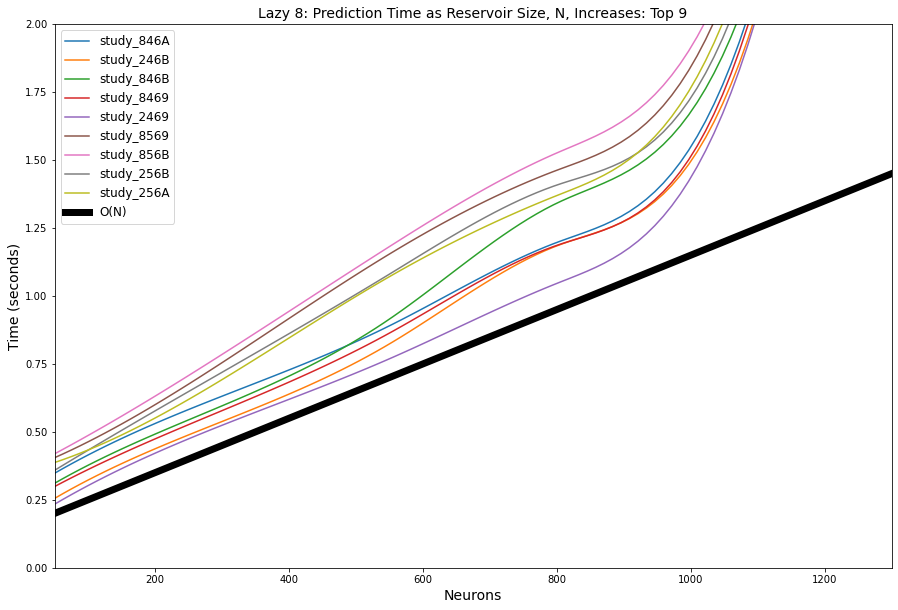

In [298]:
#add to plot
x = np.arange(50,1550,250) #Number of Neurons
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = 0.001*n+0.15
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1300])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Prediction Time as Reservoir Size, N, Increases: Top 9',fontsize=14)
plt.show()

In [24]:
studies = studies.reset_index(drop=True)

# Which reservoir activation function is the best?

## Models that scored very similar, but used different activation function

In [25]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo0 = pd.DataFrame()

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo0TimeTrain = pd.DataFrame()
plotInfo0TimePredict = pd.DataFrame()
for c in range(1,3): #Select models for evaluation
    i = 0
    if c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif c == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo0 = pd.concat((plotInfo0, pd.DataFrame(y, columns=[str(c)])), axis=1)
    plotInfo0TimeTrain = pd.concat((plotInfo0TimeTrain, pd.DataFrame(w, columns=[str(c)])), axis=1)
    plotInfo0TimePredict = pd.concat((plotInfo0TimePredict, pd.DataFrame(n, columns=[str(c)])), axis=1)

study_8469
study_8569


In [26]:
plotInfo0 = plotInfo0.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo0TimeTrain = plotInfo0TimeTrain.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo0TimePredict = plotInfo0TimePredict.rename(columns={"1": "study_8469", "2": "study_8569"})

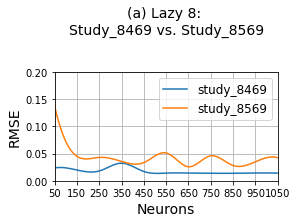

In [27]:
#add to plot
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Lazy 8: \nStudy_8469 vs. Study_8569\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0,0.2])
plt.grid()
plt.show()

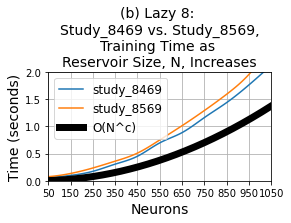

In [28]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8: \nStudy_8469 vs. Study_8569,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

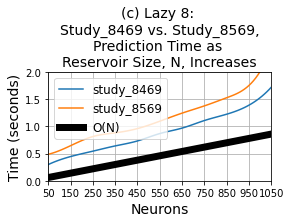

In [29]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0008*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: \nStudy_8469 vs. Study_8569,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## Same exact model with different activation function

In [30]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo1 = pd.DataFrame()
count = 1

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo1TimeTrain = pd.DataFrame()
plotInfo1TimePredict = pd.DataFrame()
while(count < 3):
    i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    print("parameters from ", str(studies.iloc[i,0]))
    print("Reservoir Function ", str(count))
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo1 = pd.concat((plotInfo1, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo1TimeTrain = pd.concat((plotInfo1TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo1TimePredict = pd.concat((plotInfo1TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_8469
Reservoir Function  1
parameters from  study_8469
Reservoir Function  2


In [31]:
plotInfo1 = plotInfo1.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo1TimeTrain = plotInfo1TimeTrain.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo1TimePredict = plotInfo1TimePredict.rename(columns={"1": "study_8469", "2": "study_8569"})

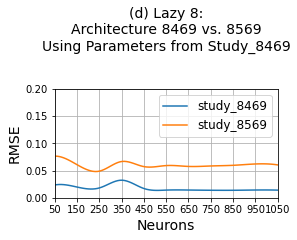

In [32]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(d) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8469\n\n',fontsize=14)
plt.show()

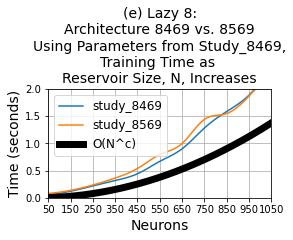

In [33]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8469,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

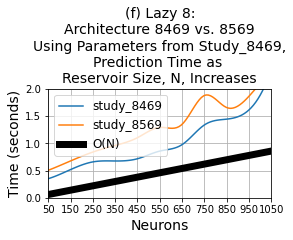

In [34]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0008*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8469,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [35]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo2 = pd.DataFrame()
count = 1

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo2TimeTrain = pd.DataFrame()
plotInfo2TimePredict = pd.DataFrame()
while(count < 3):
    i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0] #selection of model
    print("parameters from ", str(studies.iloc[i,0]))
    print("Reservoir Function ", str(count))
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo2 = pd.concat((plotInfo2, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo2TimeTrain = pd.concat((plotInfo2TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo2TimePredict = pd.concat((plotInfo2TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_8569
Reservoir Function  1
parameters from  study_8569
Reservoir Function  2


In [36]:
plotInfo2 = plotInfo2.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo2TimeTrain = plotInfo2TimeTrain.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo2TimePredict = plotInfo2TimePredict.rename(columns={"1": "study_8469", "2": "study_8569"})

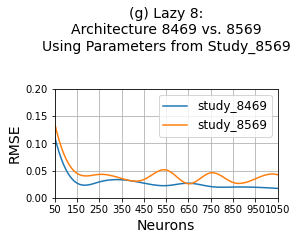

In [37]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(g) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8569\n\n', fontsize=14)
plt.show()

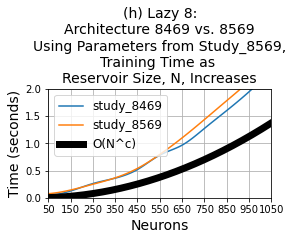

In [38]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8569,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

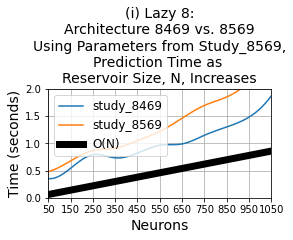

In [39]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0008*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8569,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## What parameters are controlling the influence of the reservoir activation

### spectral radius

In [40]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo22= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo22TimeTrain = pd.DataFrame()
plotInfo22TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo22 =            pd.concat((plotInfo22, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo22TimeTrain =   pd.concat((plotInfo22TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo22TimePredict = pd.concat((plotInfo22TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_8569


In [41]:
plotInfo22 =            plotInfo22.rename(columns={"0": "study_8469 SR", "1": "study_8569 SR"})
plotInfo22TimeTrain =   plotInfo22TimeTrain.rename(columns={"0": "study_8469 SR", "1": "study_8569 SR"})
plotInfo22TimePredict = plotInfo22TimePredict.rename(columns={"0": "study_8469 SR", "1": "study_8569 SR"})

In [300]:
inc = 100
x = np.arange(50,1051,inc) #Number of Neurons

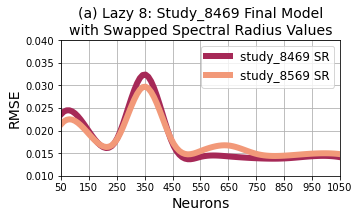

In [302]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 6
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo22.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo22.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo22.columns[col], linewidth = changeWidth, color=colors[col])
    #changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Lazy 8: Study_8469 Final Model\nwith Swapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.04])
plt.grid()
plt.show()

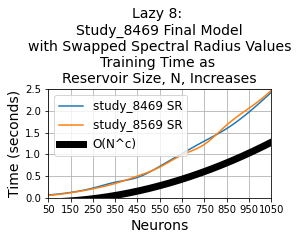

In [303]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo22TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo22TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo22TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2.5])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Spectral Radius Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

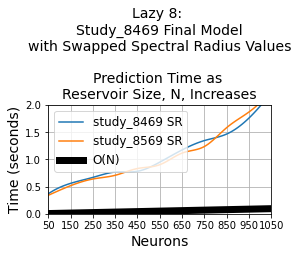

In [47]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo22TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo22TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo22TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Spectral Radius Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [184]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo23= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo23TimeTrain = pd.DataFrame()
plotInfo23TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    N = 50
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    
    print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    N=50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo23 =            pd.concat((plotInfo23, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo23TimeTrain =   pd.concat((plotInfo23TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo23TimePredict = pd.concat((plotInfo23TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
0.06125400616572453
0.12555769511631557
0.2274545431137085
0.35753646918705534
0.5409489018576485
0.7875235080718994
1.0066477400915963
1.2725348631540934
1.5865201268877303
1.8961350236620222
2.339471238000052
study_8569
0.05807658604213169
0.12102283750261579
0.20399049350193568
0.3357846736907959
0.5031670331954956
0.7551585776465279
0.9710521527699062
1.2324486800602503
1.6959060089928764
1.8906674555369787
2.31834500176566


In [185]:
plotInfo23 =            plotInfo23.rename(columns={"0": "study_8469 LR", "1": "study_8569 LR"})
plotInfo23TimeTrain =   plotInfo23TimeTrain.rename(columns={"0": "study_8469 LR", "1": "study_8569 LR"})
plotInfo23TimePredict = plotInfo23TimePredict.rename(columns={"0": "study_8469 LR", "1": "study_8569 LR"})

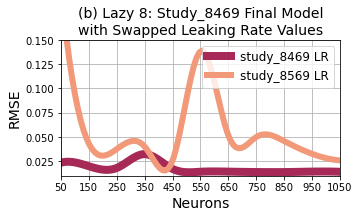

In [308]:
#add to plot
plt.figure(figsize=(5, 2.5))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo23.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(b) Lazy 8: Study_8469 Final Model\nwith Swapped Leaking Rate Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.15])
plt.grid()
plt.show()

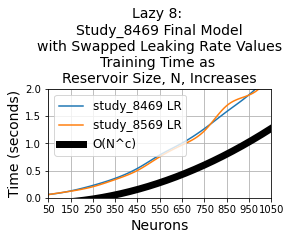

In [187]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo23TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Leaking Rate Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

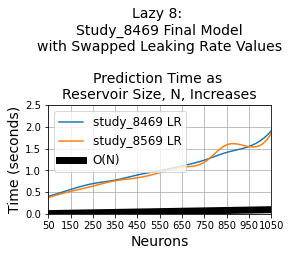

In [311]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo23TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Leaking Rate Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [53]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo24= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo24TimeTrain = pd.DataFrame()
plotInfo24TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo24 =            pd.concat((plotInfo24, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo24TimeTrain =   pd.concat((plotInfo24TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo24TimePredict = pd.concat((plotInfo24TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_8569


In [54]:
plotInfo24 =            plotInfo24.rename(columns={"0": "study_8469 dW", "1": "study_8569 dW"})
plotInfo24TimeTrain =   plotInfo24TimeTrain.rename(columns={"0": "study_8469 dW", "1": "study_8569 dW"})
plotInfo24TimePredict = plotInfo24TimePredict.rename(columns={"0": "study_8469 dW", "1": "study_8569 dW"})

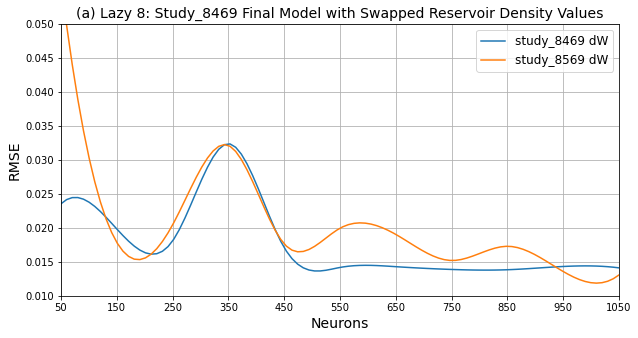

In [55]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo24.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo24.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo24.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Lazy 8: Study_8469 Final Model with Swapped Reservoir Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.05])
plt.grid()
plt.show()

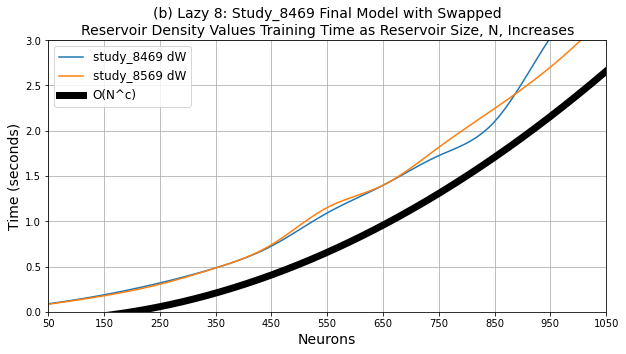

In [314]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo24TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo24TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo24TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000025*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8: Study_8469 Final Model with Swapped\nReservoir Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

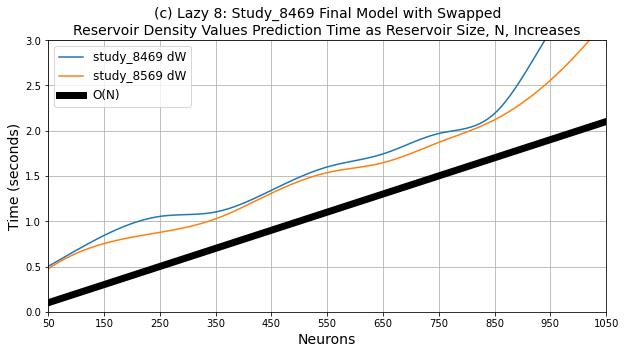

In [318]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo24TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo24TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo24TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.002*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_8469 Final Model with Swapped\nReservoir Density Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Wfb

In [107]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo40= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo40TimeTrain = pd.DataFrame()
plotInfo40TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dfb = studies.iloc[i,2].params['dfb']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo40 =            pd.concat((plotInfo40, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo40TimeTrain =   pd.concat((plotInfo40TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo40TimePredict = pd.concat((plotInfo40TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
0.04649635461660532
0.09794487271990095
0.16668568338666642
0.256223337990897
0.3992037943431309
0.8088737817911001
0.9150407825197492
1.229409885406494
1.4347947665623255
1.7759087937218803
2.108304500579834
study_8569
0.05321991443634033
0.10726442703833947
0.20102475370679582
0.31419036938593936
0.45875089509146555
0.690172580572275
0.9173443828310285
1.1937052692685808
1.5905274061056285
1.777175940000094
2.147262793320876


In [108]:
plotInfo40 =            plotInfo40.rename(columns={"0": "study_8469 dfb", "1": "study_8569 dfb"})
plotInfo40TimeTrain =   plotInfo40TimeTrain.rename(columns={"0": "study_8469 dfb", "1": "study_8569 dfb"})
plotInfo40TimePredict = plotInfo40TimePredict.rename(columns={"0": "study_8469 dfb", "1": "study_8569 dfb"})

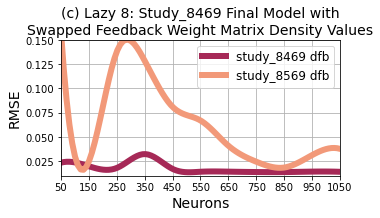

In [325]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo40.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo40.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo40.columns[col], color=colors[col], linewidth=6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) Lazy 8: Study_8469 Final Model with\nSwapped Feedback Weight Matrix Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.15])
plt.grid()
plt.show()

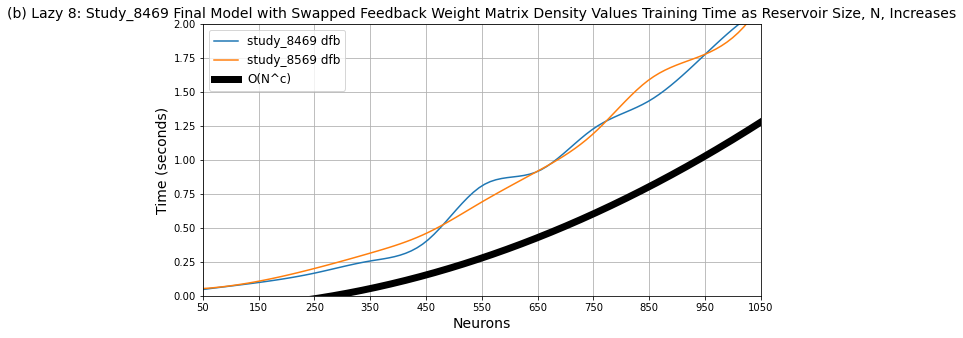

In [110]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo40TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo40TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo40TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8: Study_8469 Final Model with Swapped Feedback Weight Matrix Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

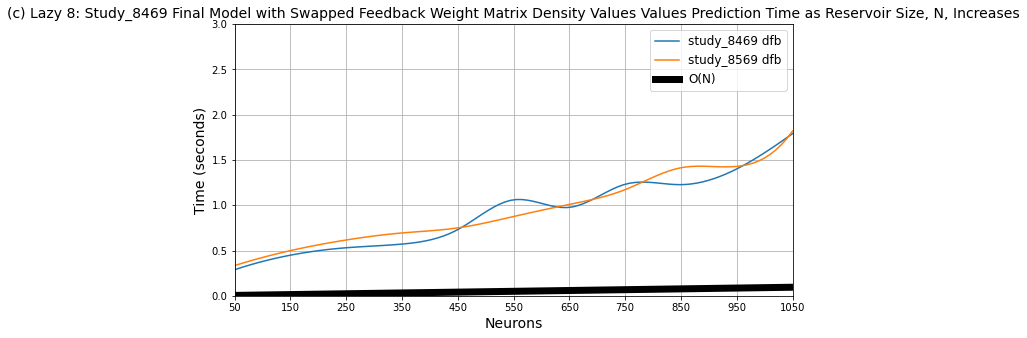

In [326]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo40TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo40TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo40TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_8469 Final Model with Swapped Feedback Weight Matrix Density Values Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [112]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo25= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo25TimeTrain = pd.DataFrame()
plotInfo25TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo25 =            pd.concat((plotInfo25, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo25TimeTrain =   pd.concat((plotInfo25TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo25TimePredict = pd.concat((plotInfo25TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_8569


In [113]:
plotInfo25 =            plotInfo25.rename(columns={"0": "study_8469 dWin", "1": "study_8569 dWin"})
plotInfo25TimeTrain =   plotInfo25TimeTrain.rename(columns={"0": "study_8469 dWin", "1": "study_8569 dWin"})
plotInfo25TimePredict = plotInfo25TimePredict.rename(columns={"0": "study_8469 dWin", "1": "study_8569 dWin"})

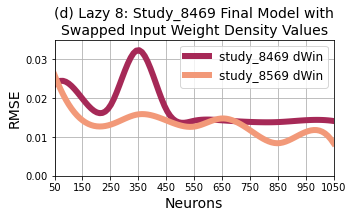

In [333]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo25.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo25.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo25.columns[col], color=colors[col], linewidth=6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Lazy 8: Study_8469 Final Model with\nSwapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.035])
plt.grid()
plt.show()

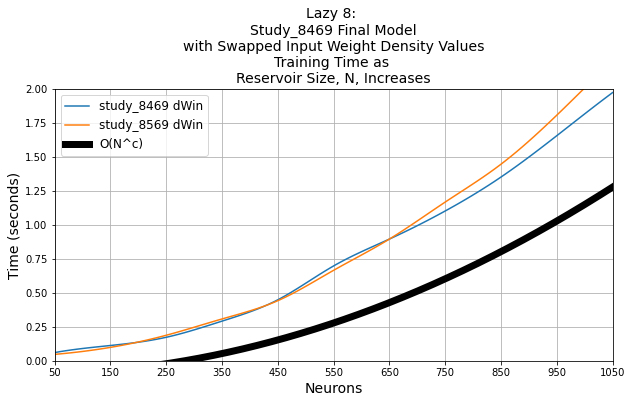

In [334]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo25TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo25TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo25TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

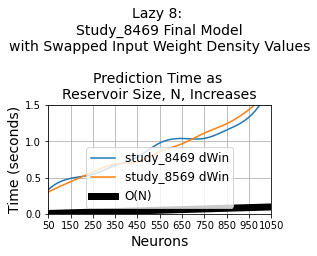

In [359]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo25TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo25TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo25TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [117]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo26= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo26TimeTrain = pd.DataFrame()
plotInfo26TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]

    
    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo26 =            pd.concat((plotInfo26, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo26TimeTrain =   pd.concat((plotInfo26TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo26TimePredict = pd.concat((plotInfo26TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_8569


In [118]:
plotInfo26 =            plotInfo26.rename(columns={"0": "study_8469 sin", "1": "study_8569 sin"})
plotInfo26TimeTrain =   plotInfo26TimeTrain.rename(columns={"0": "study_8469 sin", "1": "study_8569 sin"})
plotInfo26TimePredict = plotInfo26TimePredict.rename(columns={"0": "study_8469 sin", "1": "study_8569 sin"})

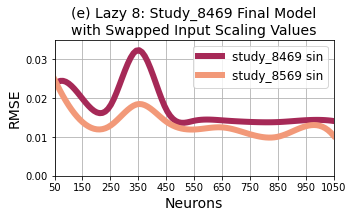

In [343]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo26.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo26.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo26.columns[col], color=colors[col], linewidth=6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(e) Lazy 8: Study_8469 Final Model\nwith Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.035])
plt.grid()
plt.show()

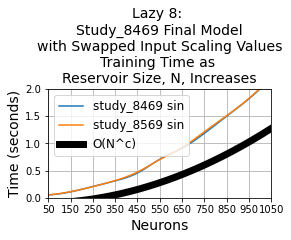

In [120]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo26TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo26TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo26TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

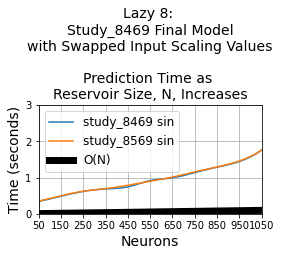

In [344]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo26TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo26TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo26TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Input Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Feedback

In [122]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo41= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo41TimeTrain = pd.DataFrame()
plotInfo41TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]

    
    print(studies.iloc[i,0])
    sfb = studies.iloc[i,2].params['sfb']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo41 =            pd.concat((plotInfo41, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo41TimeTrain =   pd.concat((plotInfo41TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo41TimePredict = pd.concat((plotInfo41TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_8569


In [123]:
plotInfo41 =            plotInfo41.rename(columns={"0": "study_8469 sfb", "1": "study_8569 sfb"})
plotInfo41TimeTrain =   plotInfo41TimeTrain.rename(columns={"0": "study_8469 sfb", "1": "study_8569 sfb"})
plotInfo41TimePredict = plotInfo41TimePredict.rename(columns={"0": "study_8469 sfb", "1": "study_8569 sfb"})

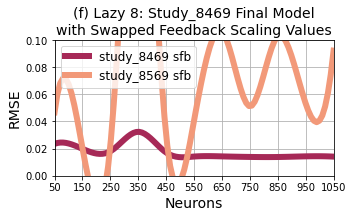

In [349]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo41.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo41.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo41.columns[col], color=colors[col], linewidth=6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(f) Lazy 8: Study_8469 Final Model\nwith Swapped Feedback Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.1])
plt.grid()
plt.show()

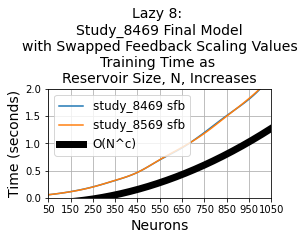

In [125]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo41TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo41TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo41TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Feedback Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

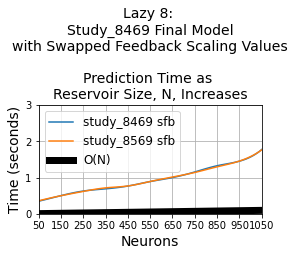

In [352]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo41TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo41TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo41TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Feedback Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [127]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo27= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo27TimeTrain = pd.DataFrame()
plotInfo27TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo27 =            pd.concat((plotInfo27, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo27TimeTrain =   pd.concat((plotInfo27TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo27TimePredict = pd.concat((plotInfo27TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_8569


In [128]:
plotInfo27 =            plotInfo27.rename(columns={"0": "study_8469 Beta", "1": "study_8569 Beta"})
plotInfo27TimeTrain =   plotInfo27TimeTrain.rename(columns={"0": "study_8469 Beta", "1": "study_8569 Beta"})
plotInfo27TimePredict = plotInfo27TimePredict.rename(columns={"0": "study_8469 Beta", "1": "study_8569 Beta"})

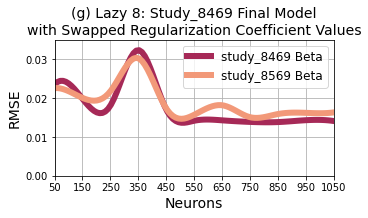

In [357]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo27.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo27.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo27.columns[col], color=colors[col], linewidth = 6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(g) Lazy 8: Study_8469 Final Model\nwith Swapped Regularization Coefficient Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.035])
plt.grid()
plt.show()

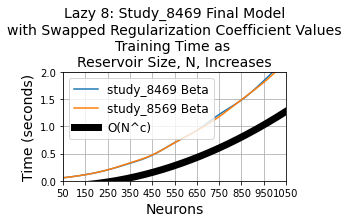

In [130]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo27TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo27TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo27TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_8469 Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

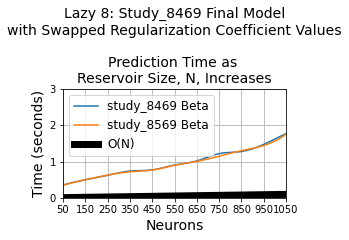

In [358]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo27TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo27TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo27TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_8469 Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# Is there an overwhelming difference in how the distribution type changes the model?

## How did the parameters vary between the models with different distributions?

In [83]:
studies.iloc[studies.loc[studies.iloc[:,0] == 'study_8469'].index[0],2].params

{'p': 0.7155824893181177,
 'a': 0.02267689445433657,
 'dw': 0.22478813011425094,
 'dfb': 0.7980529344168028,
 'din': 0.24699826611863257,
 'sin': 0.6118689005541654,
 'sfb': 1.0399679688403098,
 'B': 0.001085709832457361}

In [84]:
studies.iloc[studies.loc[studies.iloc[:,0] == 'study_856A'].index[0],2].params

{'p': 0.17915588244411945,
 'a': 0.03204707628753922,
 'dw': 0.6918387247726928,
 'dfb': 0.6940698295098646,
 'din': 0.736303597161433,
 'sin': 0.8704173329742642,
 'sfb': 1.377892400095769,
 'B': 0.13339246402921073}

In [85]:
studies.iloc[studies.loc[studies.iloc[:,0] == 'study_856B'].index[0],2].params

{'p': 0.6610500109678517,
 'a': 0.035448594975154124,
 'dw': 0.7135844166334179,
 'dfb': 0.38643522449088713,
 'din': 0.579429444546026,
 'sin': 1.7268235469443458,
 'sfb': 1.261411464622121,
 'B': 0.01592297002190032}

#### Plotted each Model w/ Different Parameters/Distribution

In [86]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo4TimeTrain = pd.DataFrame()
plotInfo4TimePredict = pd.DataFrame()
for c in range(0,3): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif c == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    print("parameters from ", str(studies.iloc[i,0]))
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]


        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo4 = pd.concat((plotInfo4, pd.DataFrame(y, columns=[str(c)])), axis=1)
    plotInfo4TimeTrain = pd.concat((plotInfo4TimeTrain, pd.DataFrame(w, columns=[str(c)])), axis=1)
    plotInfo4TimePredict = pd.concat((plotInfo4TimePredict, pd.DataFrame(n, columns=[str(c)])), axis=1)

parameters from  study_8469
parameters from  study_846A
parameters from  study_856B


In [87]:
plotInfo4 = plotInfo4.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo4TimeTrain = plotInfo4TimeTrain.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo4TimePredict = plotInfo4TimePredict.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})

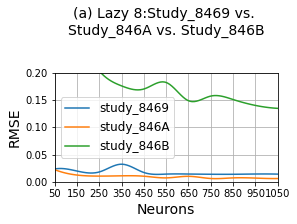

In [88]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0.0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(a) Lazy 8:Study_8469 vs. \nStudy_846A vs. Study_846B\n\n', fontsize=14)
plt.show()

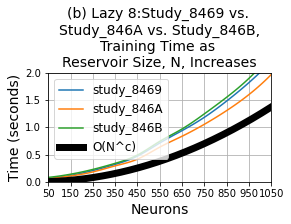

In [89]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8:Study_8469 vs. \nStudy_846A vs. Study_846B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

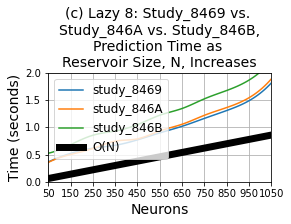

In [90]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0008*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_8469 vs. \nStudy_846A vs. Study_846B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Using the same set of parameters, does varying the distribution impair the model's ability to perform?

#### Using Parameter's of study_8469 optimized model

In [91]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo5 = pd.DataFrame()
count = 0

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo5TimeTrain = pd.DataFrame()
plotInfo5TimePredict = pd.DataFrame()
i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
while(count < 3):
    print("parameters from ", str(studies.iloc[i,0]))
    print("Distribution Function ", str(count))
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count

    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo5 = pd.concat((plotInfo5, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo5TimeTrain = pd.concat((plotInfo5TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo5TimePredict = pd.concat((plotInfo5TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_8469
Distribution Function  0
parameters from  study_8469
Distribution Function  1
parameters from  study_8469
Distribution Function  2


In [92]:
plotInfo5 = plotInfo5.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo5TimeTrain = plotInfo5TimeTrain.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo5TimePredict = plotInfo5TimePredict.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})

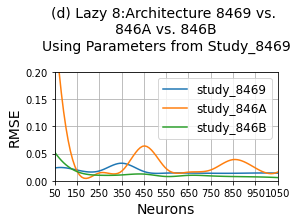

In [93]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0.0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(d) Lazy 8:Architecture 8469 vs. \n846A vs. 846B\nUsing Parameters from Study_8469\n', fontsize=14)
plt.show()

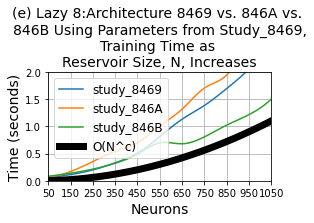

In [94]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Lazy 8:Architecture 8469 vs. 846A vs. \n846B Using Parameters from Study_8469,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

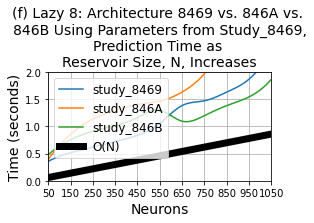

In [95]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0008*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8: Architecture 8469 vs. 846A vs. \n846B Using Parameters from Study_8469,\nPrediction Time as \nReservoir Size, N, Increases',fontsize=14)
plt.show()

#### Using Parameter's of study_846A optimized model

In [96]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo6 = pd.DataFrame()
count = 0

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo6TimeTrain = pd.DataFrame()
plotInfo6TimePredict = pd.DataFrame()
i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0] #selection of model
while(count < 3):
    print("parameters from ", str(studies.iloc[i,0]))
    print("Distribution Function ", str(count))
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count

    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo6 = pd.concat((plotInfo6, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo6TimeTrain = pd.concat((plotInfo6TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo6TimePredict = pd.concat((plotInfo6TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_846A
Distribution Function  0
parameters from  study_846A
Distribution Function  1
parameters from  study_846A
Distribution Function  2


In [97]:
plotInfo6 = plotInfo6.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo6TimeTrain = plotInfo6TimeTrain.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo6TimePredict = plotInfo6TimePredict.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})

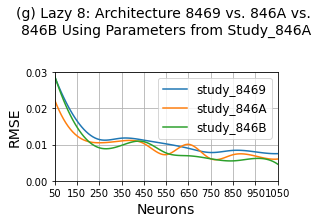

In [98]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0.0,0.03])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(g) Lazy 8: Architecture 8469 vs. 846A vs. \n846B Using Parameters from Study_846A\n\n',fontsize=14)
plt.show()

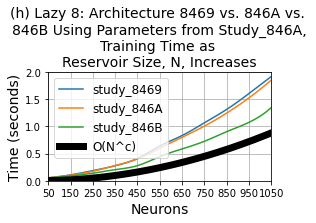

In [99]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000008*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Lazy 8: Architecture 8469 vs. 846A vs. \n846B Using Parameters from Study_846A,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

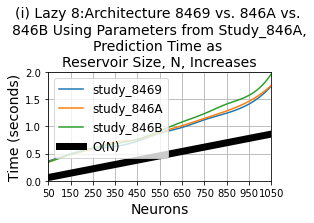

In [100]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0008*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Lazy 8:Architecture 8469 vs. 846A vs. \n846B Using Parameters from Study_846A,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

#### Using Parameter's of study_846B optimized model

In [363]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo7 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo7TimeTrain = pd.DataFrame()
plotInfo7TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
while(count < 3):
    print("parameters from ", str(studies.iloc[i,0]))
    print("Distribution Function ", str(count))
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count

    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo7 = pd.concat((plotInfo7, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo7TimeTrain = pd.concat((plotInfo7TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo7TimePredict = pd.concat((plotInfo7TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_846B
Distribution Function  0
parameters from  study_846B
Distribution Function  1
parameters from  study_846B
Distribution Function  2


In [364]:
plotInfo7 = plotInfo7.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo7TimeTrain = plotInfo7TimeTrain.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo7TimePredict = plotInfo7TimePredict.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})

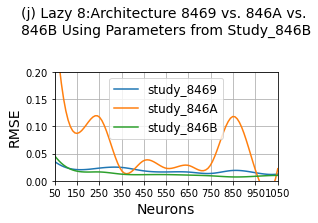

In [365]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0.0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(j) Lazy 8:Architecture 8469 vs. 846A vs. \n846B Using Parameters from Study_846B\n\n', fontsize=14)
plt.show()

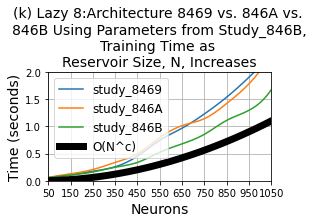

In [366]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(k) Lazy 8:Architecture 8469 vs. 846A vs. \n846B Using Parameters from Study_846B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

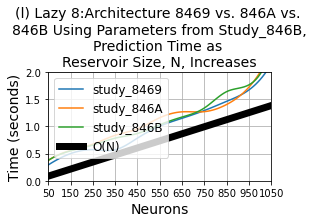

In [394]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0013*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) Lazy 8:Architecture 8469 vs. 846A vs. \n846B Using Parameters from Study_846B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## What parameters influence the function of distribution?

### spectral radius

In [132]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo28= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo28TimeTrain = pd.DataFrame()
plotInfo28TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo28 =            pd.concat((plotInfo28, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo28TimeTrain =   pd.concat((plotInfo28TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo28TimePredict = pd.concat((plotInfo28TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_846A
study_846B


In [133]:
plotInfo28 =            plotInfo28.rename(columns={"0": "study_8469 SR", "1": "study_846A SR", "2": "study_846B SR"})
plotInfo28TimeTrain =   plotInfo28TimeTrain.rename(columns={"0": "study_8469 SR", "1": "study_846A SR", "2": "study_846B SR"})
plotInfo28TimePredict = plotInfo28TimePredict.rename(columns={"0": "study_8469 SR", "1": "study_846A SR", "2": "study_846B SR"})

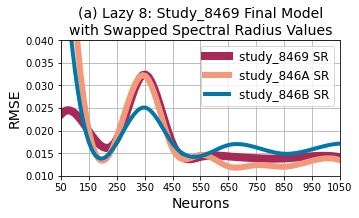

In [368]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo28.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo28.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo28.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Lazy 8: Study_8469 Final Model\nwith Swapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.04])
plt.grid()
plt.show()

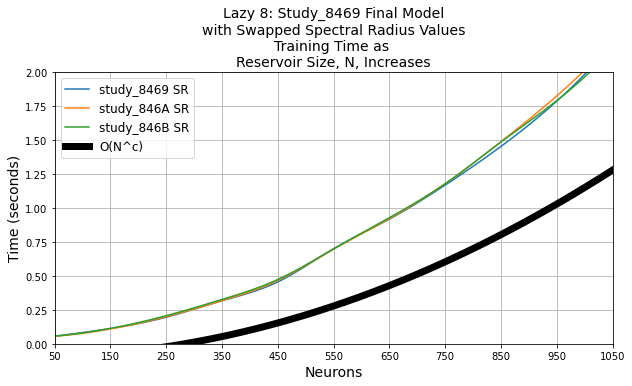

In [135]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo28TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo28TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo28TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_8469 Final Model\nwith Swapped Spectral Radius Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

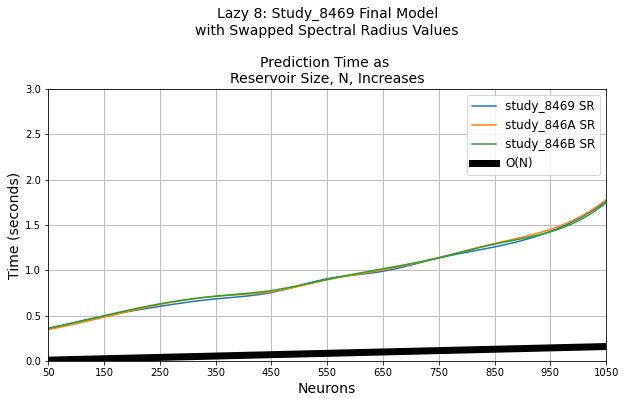

In [369]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo28TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo28TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo28TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00015*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_8469 Final Model\nwith Swapped Spectral Radius Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [864]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo29= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo29TimeTrain = pd.DataFrame()
plotInfo29TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    #print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    N=50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo29 =            pd.concat((plotInfo29, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo29TimeTrain =   pd.concat((plotInfo29TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo29TimePredict = pd.concat((plotInfo29TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [865]:
plotInfo29 =            plotInfo29.rename(columns={"0": "study_8469 LR", "1": "study_846A LR", "2": "study_846B LR"})
plotInfo29TimeTrain =   plotInfo29TimeTrain.rename(columns={"0": "study_8469 LR", "1": "study_846A LR", "2": "study_846B LR"})
plotInfo29TimePredict = plotInfo29TimePredict.rename(columns={"0": "study_8469 LR", "1": "study_846A LR", "2": "study_846B LR"})

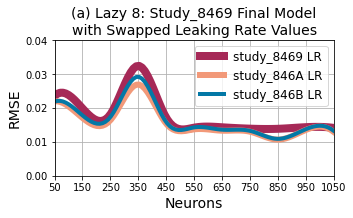

In [866]:
#add to plot
plt.figure(figsize=(5, 2.5))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo29.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo29.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo29.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Lazy 8: Study_8469 Final Model\nwith Swapped Leaking Rate Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.04])
plt.grid()
plt.show()

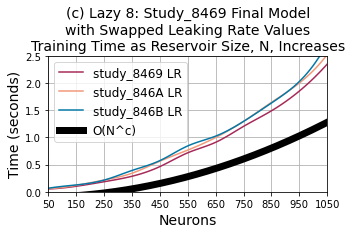

In [867]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo29TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo29TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo29TimeTrain.columns[col], color=colors[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2.5])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(c) Lazy 8: Study_8469 Final Model\nwith Swapped Leaking Rate Values\nTraining Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

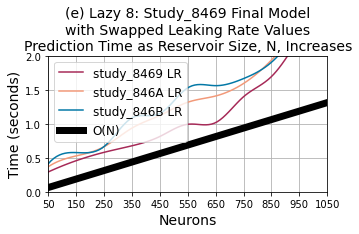

In [868]:
##### add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo29TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo29TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo29TimePredict.columns[col], color=colors[col])
    
n = np.arange(1,1550)
orderOfN = (0.00125*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2.0])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(e) Lazy 8: Study_8469 Final Model\nwith Swapped Leaking Rate Values\nPrediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [396]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo30= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo30TimeTrain = pd.DataFrame()
plotInfo30TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    print(dw)
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo30 =            pd.concat((plotInfo30, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo30TimeTrain =   pd.concat((plotInfo30TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo30TimePredict = pd.concat((plotInfo30TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
0.22478813011425094
study_846A
0.10058738443731437
study_846B
0.19588632620935795


In [397]:
plotInfo30 =            plotInfo30.rename(columns={"0": "study_8469 dW", "1": "study_846A dW", "2": "study_846B dW"})
plotInfo30TimeTrain =   plotInfo30TimeTrain.rename(columns={"0": "study_8469 dW", "1": "study_846A dW", "2": "study_846B dW"})
plotInfo30TimePredict = plotInfo30TimePredict.rename(columns={"0": "study_8469 dW", "1": "study_846A dW", "2": "study_846B dW"})

In [406]:
plotInfo30

study_8469 dW  study_846A dW  study_846B dW
0        0.023535       0.268748       0.052147
1        0.019844       0.022970       0.019708
2        0.018062       0.017024       0.017580
3        0.032382       0.040235       0.046092
4        0.017107       0.015564       0.017035
5        0.014172       0.021522       0.016804
6        0.014287       0.018616       0.017314
7        0.013878       0.015540       0.012964
8        0.013835       0.018215       0.011666
9        0.014314       0.011903       0.013900
10       0.014113       0.011119       0.010893

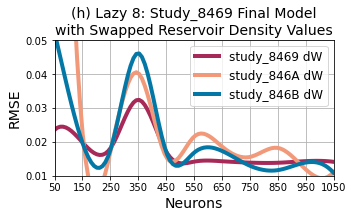

In [792]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo30.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30.columns[col], color=colors[col], linewidth=4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(h) Lazy 8: Study_8469 Final Model\nwith Swapped Reservoir Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.05])
plt.grid()
plt.show()

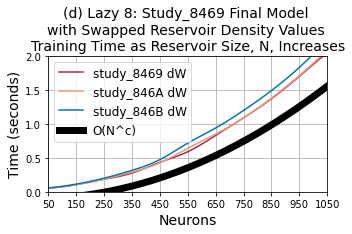

In [439]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo30TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30TimeTrain.columns[col], color=colors[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(d) Lazy 8: Study_8469 Final Model \nwith Swapped Reservoir Density Values \nTraining Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

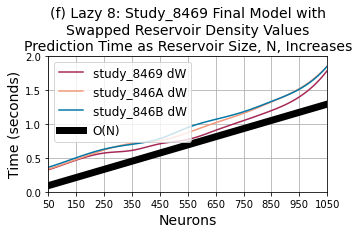

In [445]:
##### add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo30TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30TimePredict.columns[col], color=colors[col])
    
n = np.arange(1,1550)
orderOfN = (0.0012*n)+0.03
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8: Study_8469 Final Model with\nSwapped Reservoir Density Values\nPrediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Wfb

In [147]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo42= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo42TimeTrain = pd.DataFrame()
plotInfo42TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    
    print(studies.iloc[i,0])
    N = 50
    dfb = studies.iloc[i,2].params['dfb']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo42 =            pd.concat((plotInfo42, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo42TimeTrain =   pd.concat((plotInfo42TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo42TimePredict = pd.concat((plotInfo42TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_846A
study_846B


In [148]:
plotInfo42 =            plotInfo42.rename(columns={"0": "study_8469 dfb", "1": "study_846A dfb", "2": "study_846B dfb"})
plotInfo42TimeTrain =   plotInfo42TimeTrain.rename(columns={"0": "study_8469 dfb", "1": "study_846A dfb", "2": "study_846B dfb"})
plotInfo42TimePredict = plotInfo42TimePredict.rename(columns={"0": "study_8469 dfb", "1": "study_846A dfb", "2": "study_846B dfb"})

In [420]:
plotInfo42

study_8469 dfb  study_846A dfb  study_846B dfb
0         0.023535        0.023790        0.039685
1         0.019844        0.015968        0.019166
2         0.018062        0.013573        0.018239
3         0.032382        0.012657        0.025491
4         0.017107        0.018094        0.017212
5         0.014172        0.013255        0.013537
6         0.014287        0.012564        0.014171
7         0.013878        0.012173        0.012143
8         0.013835        0.009567        0.013131
9         0.014314        0.009384        0.011283
10        0.014113        0.011663        0.012168

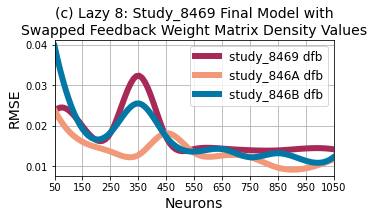

In [410]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo42.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo42.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo42.columns[col], color=colors[col], linewidth=6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) Lazy 8: Study_8469 Final Model with\nSwapped Feedback Weight Matrix Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
#plt.ylim([0.04,0.05])
plt.grid()
plt.show()

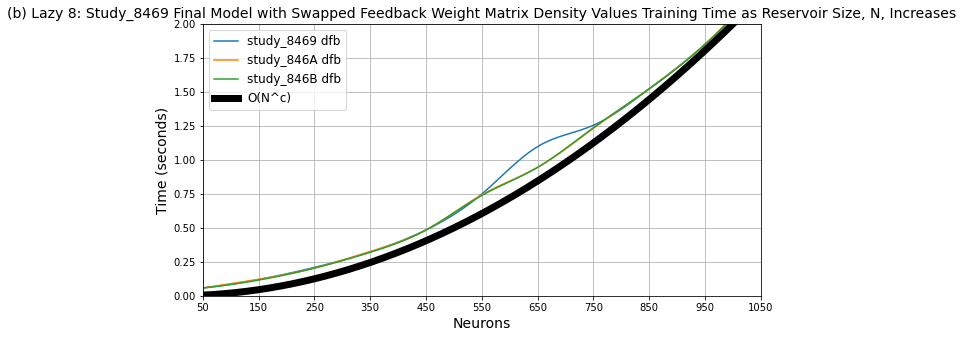

In [375]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo42TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo42TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo42TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000002*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8: Study_8469 Final Model with Swapped Feedback Weight Matrix Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

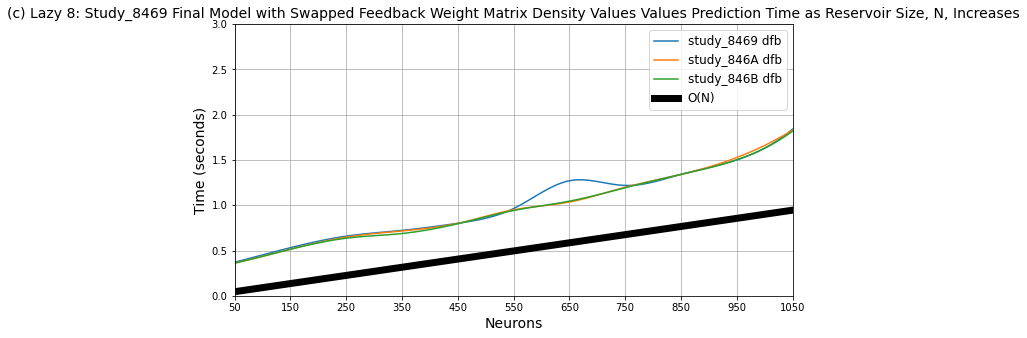

In [376]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo42TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo42TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo42TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_8469 Final Model with Swapped Feedback Weight Matrix Density Values Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Wfb

In [147]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo42= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo42TimeTrain = pd.DataFrame()
plotInfo42TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    
    print(studies.iloc[i,0])
    N = 50
    dfb = studies.iloc[i,2].params['dfb']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo42 =            pd.concat((plotInfo42, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo42TimeTrain =   pd.concat((plotInfo42TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo42TimePredict = pd.concat((plotInfo42TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_846A
study_846B


In [148]:
plotInfo42 =            plotInfo42.rename(columns={"0": "study_8469 dfb", "1": "study_846A dfb", "2": "study_846B dfb"})
plotInfo42TimeTrain =   plotInfo42TimeTrain.rename(columns={"0": "study_8469 dfb", "1": "study_846A dfb", "2": "study_846B dfb"})
plotInfo42TimePredict = plotInfo42TimePredict.rename(columns={"0": "study_8469 dfb", "1": "study_846A dfb", "2": "study_846B dfb"})

In [420]:
plotInfo42

study_8469 dfb  study_846A dfb  study_846B dfb
0         0.023535        0.023790        0.039685
1         0.019844        0.015968        0.019166
2         0.018062        0.013573        0.018239
3         0.032382        0.012657        0.025491
4         0.017107        0.018094        0.017212
5         0.014172        0.013255        0.013537
6         0.014287        0.012564        0.014171
7         0.013878        0.012173        0.012143
8         0.013835        0.009567        0.013131
9         0.014314        0.009384        0.011283
10        0.014113        0.011663        0.012168

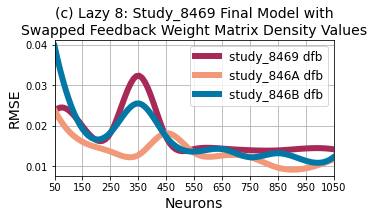

In [410]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo42.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo42.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo42.columns[col], color=colors[col], linewidth=6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) Lazy 8: Study_8469 Final Model with\nSwapped Feedback Weight Matrix Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
#plt.ylim([0.04,0.05])
plt.grid()
plt.show()

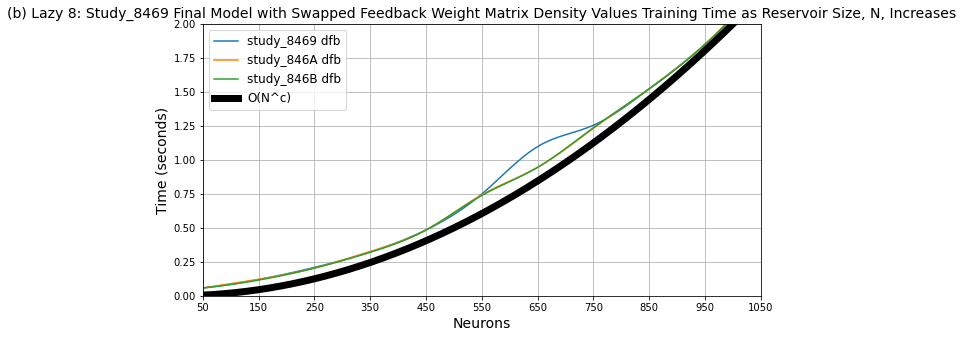

In [375]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo42TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo42TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo42TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000002*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8: Study_8469 Final Model with Swapped Feedback Weight Matrix Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

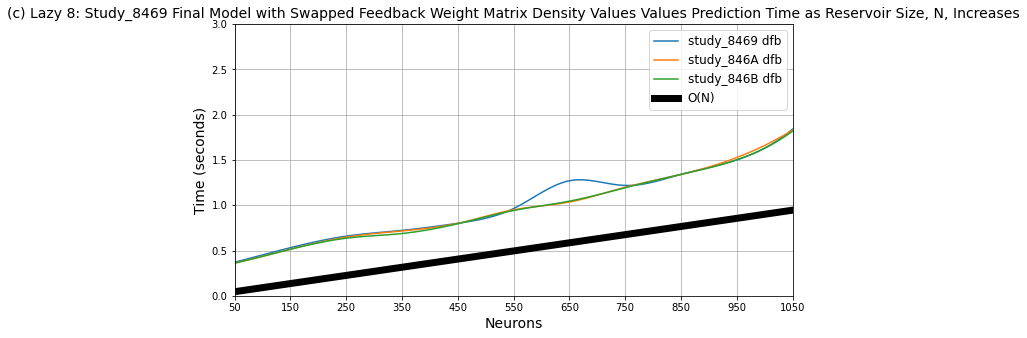

In [376]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo42TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo42TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo42TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_8469 Final Model with Swapped Feedback Weight Matrix Density Values Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [152]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo31= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo31TimeTrain = pd.DataFrame()
plotInfo31TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo31 =            pd.concat((plotInfo31, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo31TimeTrain =   pd.concat((plotInfo31TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo31TimePredict = pd.concat((plotInfo31TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_846A
study_846B


In [153]:
plotInfo31 =            plotInfo31.rename(columns={"0": "study_8469 dWin", "1": "study_846A dWin", "2": "study_846B dWin"})
plotInfo31TimeTrain =   plotInfo31TimeTrain.rename(columns={"0": "study_8469 dWin", "1": "study_846A dWin", "2": "study_846B dWin"})
plotInfo31TimePredict = plotInfo31TimePredict.rename(columns={"0": "study_8469 dWin", "1": "study_846A dWin", "2": "study_846B dWin"})

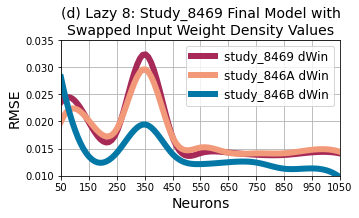

In [414]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo31.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo31.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo31.columns[col], color=colors[col], linewidth=6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Lazy 8: Study_8469 Final Model with\nSwapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.035])
plt.grid()
plt.show()

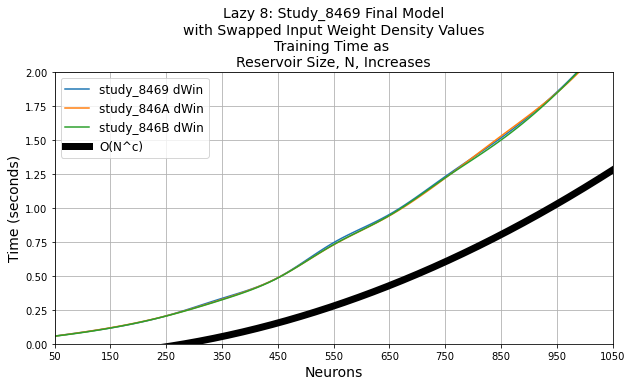

In [378]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo31TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo31TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo31TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_8469 Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

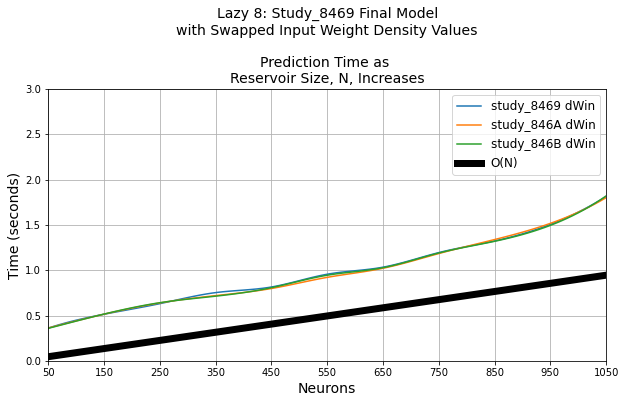

In [379]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo31TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo31TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo31TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_8469 Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [157]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo32= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo32TimeTrain = pd.DataFrame()
plotInfo32TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]

    
    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo32 =            pd.concat((plotInfo32, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo32TimeTrain =   pd.concat((plotInfo32TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo32TimePredict = pd.concat((plotInfo32TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_846A
study_846B


In [158]:
plotInfo32 =            plotInfo32.rename(columns={"0": "study_8469 sin", "1": "study_846A sin", "2": "study_846B sin"})
plotInfo32TimeTrain =   plotInfo32TimeTrain.rename(columns={"0": "study_8469 sin", "1": "study_846A sin", "2": "study_846B sin"})
plotInfo32TimePredict = plotInfo32TimePredict.rename(columns={"0": "study_8469 sin", "1": "study_846A sin", "2": "study_846B sin"})

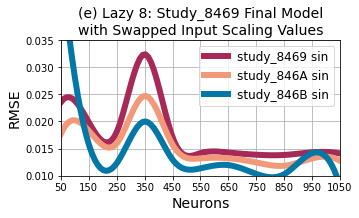

In [415]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo32.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo32.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo32.columns[col] ,color=colors[col], linewidth = 6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(e) Lazy 8: Study_8469 Final Model\nwith Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.035])
plt.grid()
plt.show()

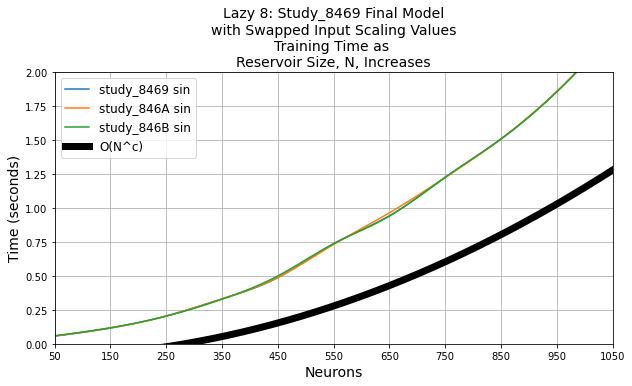

In [381]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo32TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo32TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo32TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_8469 Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

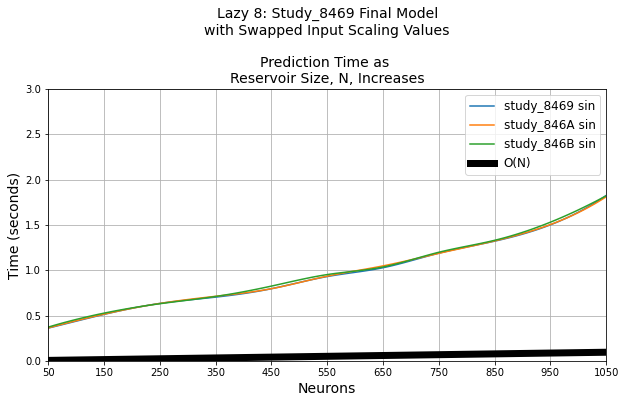

In [383]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo32TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo32TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo32TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_8469 Final Model\nwith Swapped Input Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Feedback

In [789]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo43= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo43TimeTrain = pd.DataFrame()
plotInfo43TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]

    
    print(studies.iloc[i,0])
    sfb = studies.iloc[i,2].params['sfb']
    print(sfb)
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo43 =            pd.concat((plotInfo43, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo43TimeTrain =   pd.concat((plotInfo43TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo43TimePredict = pd.concat((plotInfo43TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
1.0399679688403098
study_846A
1.3786047847785634
study_846B
1.0399287096373628


In [163]:
plotInfo43 =            plotInfo43.rename(columns={"0": "study_8469 sfb", "1": "study_846A sfb", "2": "study_846B sfb"})
plotInfo43TimeTrain =   plotInfo43TimeTrain.rename(columns={"0": "study_8469 sfb", "1": "study_846A sfb", "2": "study_846B sfb"})
plotInfo43TimePredict = plotInfo43TimePredict.rename(columns={"0": "study_8469 sfb", "1": "study_846A sfb", "2": "study_846B sfb"})

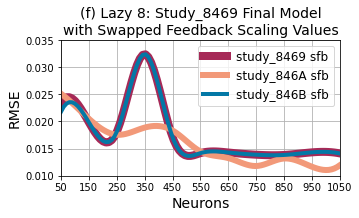

In [418]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
for col in range(0,plotInfo43.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo43.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo43.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(f) Lazy 8: Study_8469 Final Model\nwith Swapped Feedback Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.035])
plt.grid()
plt.show()

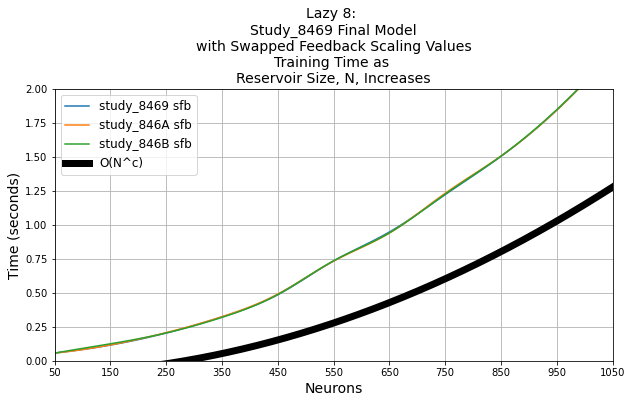

In [385]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo43TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo43TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo43TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Feedback Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

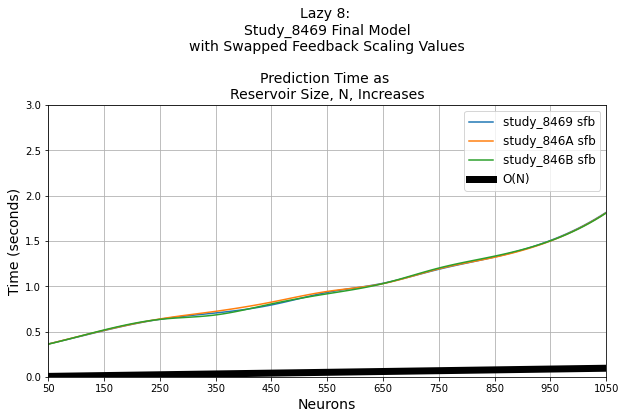

In [386]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo43TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo43TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo43TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Feedback Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [783]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo33= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo33TimeTrain = pd.DataFrame()
plotInfo33TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    print(B)
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo33 =            pd.concat((plotInfo33, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo33TimeTrain =   pd.concat((plotInfo33TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo33TimePredict = pd.concat((plotInfo33TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
0.001085709832457361
study_846A
0.002401829829257553
study_846B
0.004520710422521413


In [784]:
plotInfo33 =            plotInfo33.rename(columns={"0": "study_8469 Beta", "1": "study_846A Beta", "2": "study_846B Beta"})
plotInfo33TimeTrain =   plotInfo33TimeTrain.rename(columns={"0": "study_8469 Beta", "1": "study_846A Beta", "2": "study_846B Beta"})
plotInfo33TimePredict = plotInfo33TimePredict.rename(columns={"0": "study_8469 Beta", "1": "study_846A Beta", "2": "study_846B Beta"})

In [785]:
plotInfo33

study_8469 Beta  study_846A Beta  study_846B Beta
0          0.023535         0.020141         0.058065
1          0.019844         0.019677         0.019696
2          0.018062         0.018498         0.020044
3          0.032382         0.036302         0.029481
4          0.017107         0.016358         0.016104
5          0.014172         0.014950         0.014546
6          0.014287         0.014814         0.015710
7          0.013878         0.013844         0.013675
8          0.013835         0.013299         0.013183
9          0.014314         0.016171         0.014372
10         0.014113         0.013959         0.014131

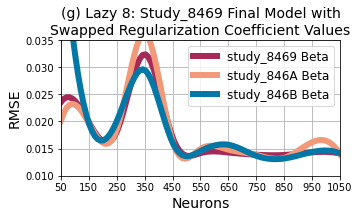

In [790]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo33.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo33.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo33.columns[col], color=colors[col], linewidth = 6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(g) Lazy 8: Study_8469 Final Model with\nSwapped Regularization Coefficient Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.035])
plt.grid()
plt.show()

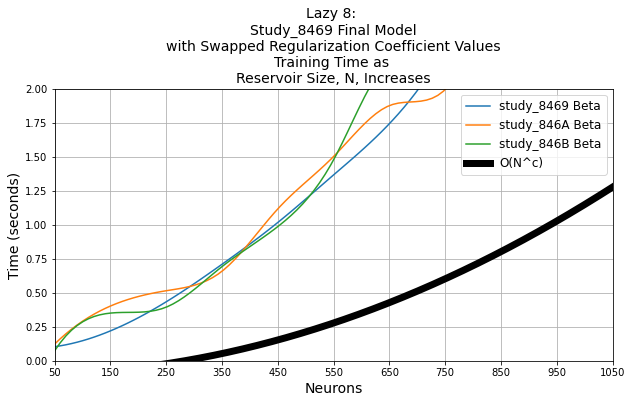

In [787]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo33TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo33TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo33TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

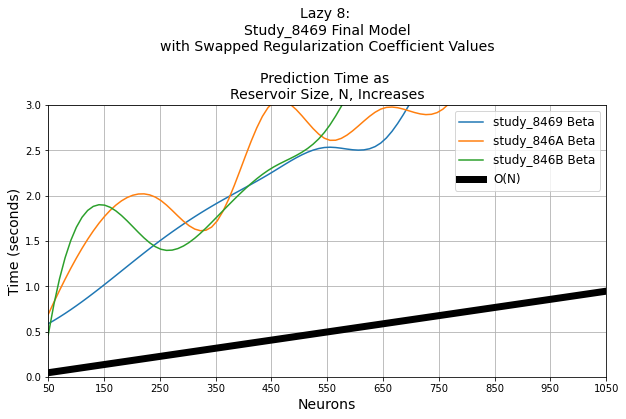

In [788]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo33TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo33TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo33TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: \nStudy_8469 Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# Which connections within the reservoir give the best setup for this pattern generation task?

## How did the parameters vary between the models with different connections?

In [171]:
print(studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,2].params

study_146B


{'p': 0.6888772535695441,
 'a': 0.07134931619289811,
 'dw': 0.22833802044329835,
 'dfb': 0.4096801628295442,
 'din': 0.4111265392206588,
 'sin': 0.0701109041442611,
 'sfb': 1.5925906663591427,
 'B': 0.006536592505253408}

In [172]:
print(studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,2].params

study_246B


{'p': 0.8971020291754769,
 'a': 0.0437681455588981,
 'dw': 0.47038679669084155,
 'dfb': 0.6651479136661085,
 'din': 0.9194688156783356,
 'sin': 0.4553272881927348,
 'sfb': 1.1389690264717531,
 'B': 0.002292524141953427}

In [173]:
print(studies.loc[studies.iloc[:,0] == 'study_346B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_346B'].iloc[0,2].params

study_346B


{'p': 0.8699422956690332,
 'a': 0.036903476777572636,
 'dw': 0.6573265857099149,
 'dfb': 0.395553838590089,
 'din': 0.7949789463834354,
 'sin': 1.2005033779201422,
 'sfb': 1.0569434293698579,
 'B': 0.007177746692301431}

In [174]:
print(studies.loc[studies.iloc[:,0] == 'study_846B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_846B'].iloc[0,2].params

study_846B


{'p': 0.47163038219444653,
 'a': 0.02125807386630776,
 'dw': 0.19588632620935795,
 'dfb': 0.7751230270899211,
 'din': 0.519357031118256,
 'sin': 1.68241425497044,
 'sfb': 1.0399287096373628,
 'B': 0.004520710422521413}

parameters from  study_146B
parameters from  study_246B
parameters from  study_346B
parameters from  study_846B


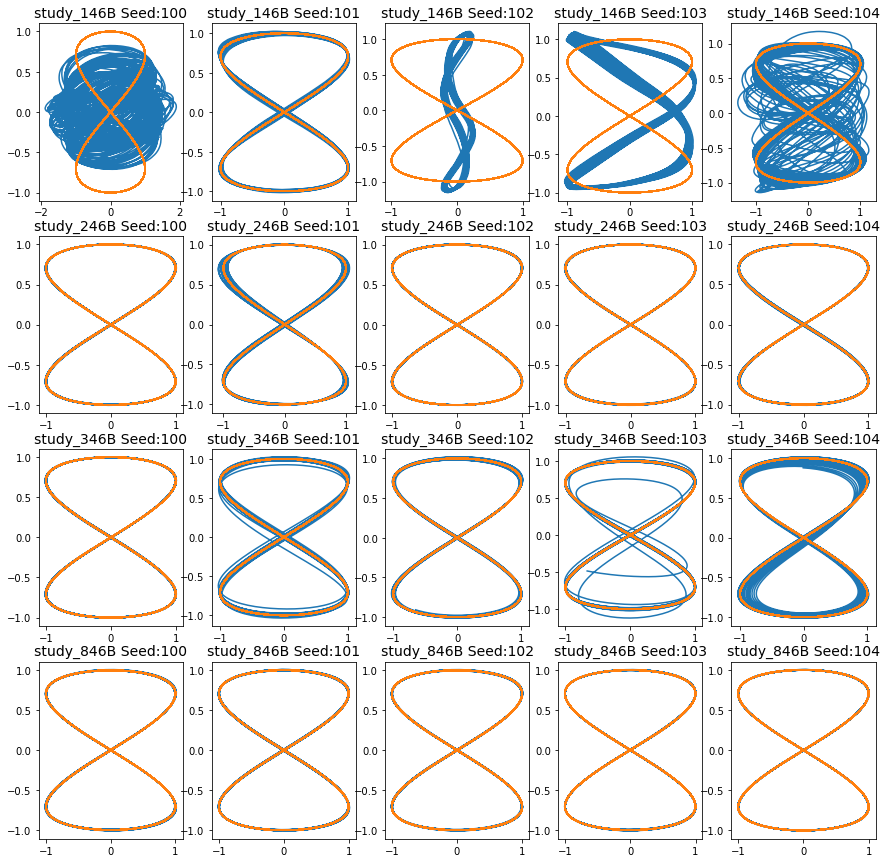

In [158]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
washout = 1000

scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo13= pd.DataFrame()
plotInfo130 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo13TimeTrain = pd.DataFrame()
plotInfo13TimePredict = pd.DataFrame()

fig, axs = plt.subplots(4, 5, figsize=(15,15))
while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    #uConn = False
    #yConn = False
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
        x = 0
        #uConn = True
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
        x=1
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
        x=2
        #uConn = True
        #yConn = True
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
        x=3
        #yConn = True
    
    print("parameters from ", str(studies.iloc[i,0]))
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    v = np.random.uniform(-0.01,0.01,(20000, N))
    seed = 100
    for k in range(0,5):#This is for gathering multiple samples for an instatiation with N neurons
        model = esn(K = K,
            L = L,
            N = N,
            p = p,
            a = a,
            v = v,
            dw = dw,
            din = din,
            dfb = dfb,
            sin = sin,
            sfb = sfb,
            sv = sv,
            resFunc = resFunc,
            outFunc = outFunc,
            outAlg = outAlg,
            B = B,
            distribution = distribution,
            isBias = isBias,
            isU2Y = isU2Y,
            isY2Y = isY2Y,
            isClassification = isClassification)

        start = time.time()
        model.sv = 0
        model.generateW(seed)
        model.generateWin(seed)
        model.generateWfb(seed)

        model.train(input_u = None, teacher=data, washout=washout)
        end = time.time()
        timesTrain[k,0] = end-start

        start = time.time() 
        model.sv = 1
        predicted = model.run(input_u=None, time=20000,washout=washout)
        end = time.time()

        nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
        scores[k,0] = nrmse0
        scores[k,1] = r20
        timesPredict[k,0] = end-start
        seed = seed + 1
        #print("Score received")
        del model
        
        axs[x, k].plot(predicted[:,0], predicted[:,1], label='Predicted')
        axs[x, k].plot(dataval[washout:,0], dataval[washout:,1], label='Actual')
        axs[x, k].set_title(str(studies.iloc[i,0]) + " Seed:" + str(seed-1),fontsize=14)
        
    plotInfo13 = pd.concat((plotInfo13, pd.DataFrame(scores[:,0], columns=[str(count)])), axis=1)
    plotInfo130 = pd.concat((plotInfo130, pd.DataFrame(scores[:,1], columns=[str(count)])), axis=1)
    plotInfo13TimeTrain = pd.concat((plotInfo13TimeTrain, pd.DataFrame(timesTrain[:,0], columns=[str(count)])), axis=1)
    plotInfo13TimePredict = pd.concat((plotInfo13TimePredict, pd.DataFrame(timesPredict[:,0], columns=[str(count)])), axis=1)
    count = count + 1

#### Plotted each Model w/ Different Parameters/Distribution

In [15]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo8= pd.DataFrame()
plotInfo80 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo8TimeTrain = pd.DataFrame()
plotInfo8TimePredict = pd.DataFrame()

while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    #uConn = False
    #yConn = False
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
        #uConn = True
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
        #uConn = True
        #yConn = True
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
        #yConn = True
    
    print("parameters from ", str(studies.iloc[i,0]))
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo8 = pd.concat((plotInfo8, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo80 = pd.concat((plotInfo80, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo8TimeTrain = pd.concat((plotInfo8TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo8TimePredict = pd.concat((plotInfo8TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_146B
parameters from  study_246B
parameters from  study_346B
parameters from  study_846B


In [16]:
plotInfo8 = plotInfo8.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo80 = plotInfo80.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo8TimeTrain = plotInfo8TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo8TimePredict = plotInfo8TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

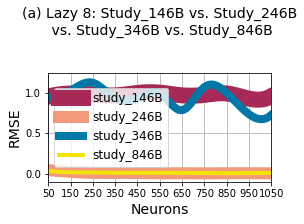

In [135]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 16
for col in range(0,plotInfo8.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth =changeWidth - 4

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([-0.1,1.25])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(a) Lazy 8: Study_146B vs. Study_246B\n vs. Study_346B vs. Study_846B\n\n', fontsize=14)
plt.show()

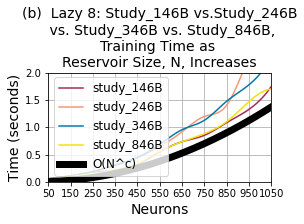

In [137]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo8TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimeTrain.columns[col], color=colors[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b)  Lazy 8: Study_146B vs.Study_246B\n vs. Study_346B vs. Study_846B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

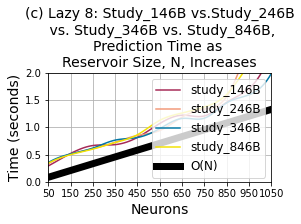

In [138]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo8TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimePredict.columns[col], color=colors[col])
    
n = np.arange(1,1550)
orderOfN = (0.00125*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_146B vs.Study_246B\n vs. Study_346B vs. Study_846B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Using the same set of parameters, does varying the connection impair the model's ability to perform?

In [75]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo9= pd.DataFrame()
plotInfo90 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo9TimeTrain = pd.DataFrame()
plotInfo9TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    print("parameters from ", str(studies.iloc[i,0]))
    print("Connections ", str(count))
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo9 = pd.concat((plotInfo9, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo90 = pd.concat((plotInfo90, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo9TimeTrain = pd.concat((plotInfo9TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo9TimePredict = pd.concat((plotInfo9TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_146B
Connections  0
parameters from  study_146B
Connections  1
parameters from  study_146B
Connections  2
parameters from  study_146B
Connections  3


In [76]:
plotInfo9 = plotInfo9.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo9TimeTrain = plotInfo9TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo9TimePredict = plotInfo9TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

In [77]:
plotInfo90 = plotInfo90.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

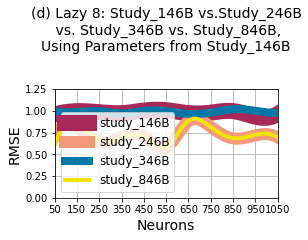

In [116]:
#add to plot
plt.figure(figsize=(4, 2))
changeWidth = 16
size = plotInfo9.shape[1]
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,size):
    X_Y_Spline = make_interp_spline(x, plotInfo9.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9.columns[col],linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 4

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0.0,1.25])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(d) Lazy 8: Study_146B vs.Study_246B\n vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_146B\n\n', fontsize=14)
plt.show()

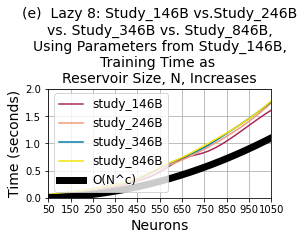

In [139]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo9TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimeTrain.columns[col], color=colors[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e)  Lazy 8: Study_146B vs.Study_246B\nvs. Study_346B vs. Study_846B,\nUsing Parameters from Study_146B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

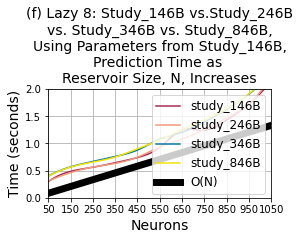

In [140]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo9TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimePredict.columns[col], color=colors[col])
    
n = np.arange(1,1550)
orderOfN = (0.00125*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8: Study_146B vs.Study_246B\nvs. Study_346B vs. Study_846B,\nUsing Parameters from Study_146B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [81]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo10= pd.DataFrame()
plotInfo100 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo10TimeTrain = pd.DataFrame()
plotInfo10TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    print("parameters from ", str(studies.iloc[i,0]))
    print("Connections ", str(count))
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo10 = pd.concat((plotInfo10, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo100 = pd.concat((plotInfo100, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo10TimeTrain = pd.concat((plotInfo10TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo10TimePredict = pd.concat((plotInfo10TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_246B
Connections  0
parameters from  study_246B
Connections  1
parameters from  study_246B
Connections  2
parameters from  study_246B
Connections  3


In [82]:
plotInfo10 = plotInfo10.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo100 = plotInfo100.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo10TimeTrain = plotInfo10TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo10TimePredict = plotInfo10TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

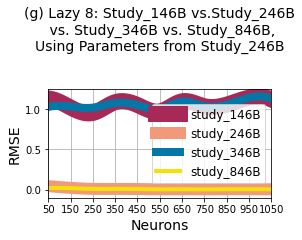

In [115]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 16
for col in range(0,plotInfo10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10.columns[col], color=colors[col], linewidth = changeWidth)
    changeWidth = changeWidth - 4

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([-0.1,1.25])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(g) Lazy 8: Study_146B vs.Study_246B\n vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_246B\n\n', fontsize=14)
plt.show()

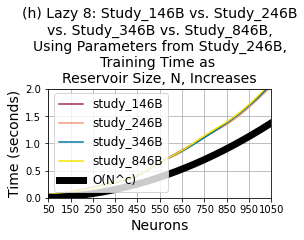

In [141]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo10TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimeTrain.columns[col], color=colors[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Lazy 8: Study_146B vs. Study_246B\nvs. Study_346B vs. Study_846B,\nUsing Parameters from Study_246B,\nTraining Time as \nReservoir Size, N, Increases',fontsize=14)
plt.show()

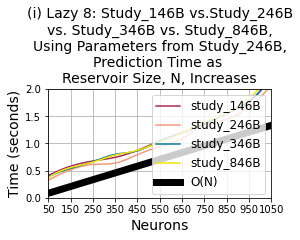

In [142]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo10TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimePredict.columns[col], color=colors[col])
    
n = np.arange(1,1550)
orderOfN = (0.00125*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Lazy 8: Study_146B vs.Study_246B\nvs. Study_346B vs. Study_846B,\nUsing Parameters from Study_246B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [86]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo11= pd.DataFrame()
plotInfo110 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo11TimeTrain = pd.DataFrame()
plotInfo11TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    print("parameters from ", str(studies.iloc[i,0]))
    print("Connections ", str(count))
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo11 = pd.concat((plotInfo11, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo110 = pd.concat((plotInfo110, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo11TimeTrain = pd.concat((plotInfo11TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo11TimePredict = pd.concat((plotInfo11TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_346B
Connections  0
parameters from  study_346B
Connections  1
parameters from  study_346B
Connections  2
parameters from  study_346B
Connections  3


In [87]:
plotInfo11 = plotInfo11.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo110 = plotInfo110.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo11TimeTrain = plotInfo11TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo11TimePredict = plotInfo11TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

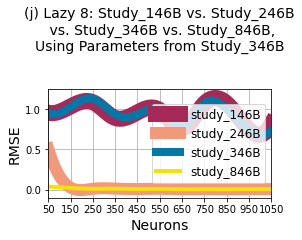

In [120]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo11.shape[1]
changeWidth = 16
for col in range(0,size):
    X_Y_Spline = make_interp_spline(x, plotInfo11.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth - 4

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([-0.1,1.25])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(j) Lazy 8: Study_146B vs. Study_246B\n vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_346B\n\n', fontsize=14)
plt.show()

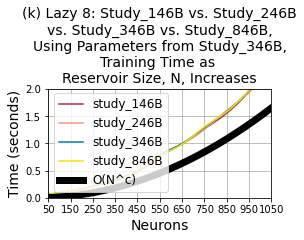

In [143]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo11TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimeTrain.columns[col], color=colors[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(k) Lazy 8: Study_146B vs. Study_246B\nvs. Study_346B vs. Study_846B,\nUsing Parameters from Study_346B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

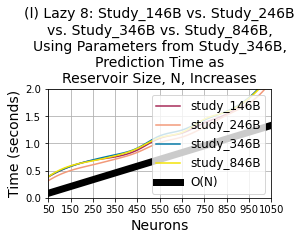

In [144]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo11TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimePredict.columns[col], color=colors[col])
    
n = np.arange(1,1550)
orderOfN = (0.00125*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) Lazy 8: Study_146B vs. Study_246B\nvs. Study_346B vs. Study_846B,\nUsing Parameters from Study_346B,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [91]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo12= pd.DataFrame()
plotInfo120 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo12TimeTrain = pd.DataFrame()
plotInfo12TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
        
    print("parameters from ", str(studies.iloc[i,0]))
    print("Connections ", str(count))
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo12 = pd.concat((plotInfo12, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo120 = pd.concat((plotInfo120, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo12TimeTrain = pd.concat((plotInfo12TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo12TimePredict = pd.concat((plotInfo12TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

parameters from  study_846B
Connections  0
parameters from  study_846B
Connections  1
parameters from  study_846B
Connections  2
parameters from  study_846B
Connections  3


In [92]:
plotInfo12 = plotInfo12.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo120 = plotInfo120.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo12TimeTrain = plotInfo12TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo12TimePredict = plotInfo12TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

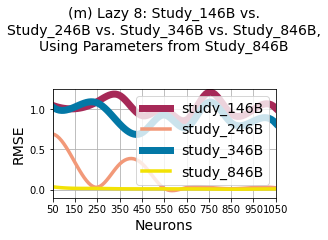

In [130]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo12.shape[1]
changeWidth = 7
for col in range(0,int(size/2)):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2
    
changeWidth = 7
for col in range(int(size/2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2

plt.legend(fontsize=14)
plt.xlim([50,1050])
plt.ylim([-0.1,1.25])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(m) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_846B\n\n', fontsize=14)
plt.show()

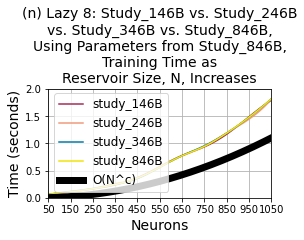

In [145]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo12TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimeTrain.columns[col], color=colors[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(n) Lazy 8: Study_146B vs. Study_246B\nvs. Study_346B vs. Study_846B,\nUsing Parameters from Study_846B,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

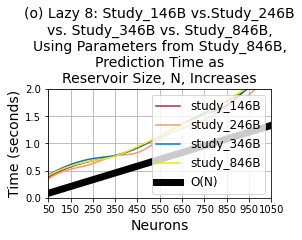

In [146]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo12TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimePredict.columns[col], color=colors[col])
    
n = np.arange(1,1550)
orderOfN = (0.00125*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(o) Lazy 8: Study_146B vs.Study_246B\nvs. Study_346B vs. Study_846B,\nUsing Parameters from Study_846B,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

## What parameters influence the function of connections?

### spectral radius

In [869]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo16= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo16TimeTrain = pd.DataFrame()
plotInfo16TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo16 =            pd.concat((plotInfo16, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo16TimeTrain =   pd.concat((plotInfo16TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo16TimePredict = pd.concat((plotInfo16TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_146B
study_246B
study_346B
study_846B


In [870]:
plotInfo16 =            plotInfo16.rename(columns={"0": "study_146B SR", "1": "study_246B SR", "2": "study_346B SR", "3": "study_846B SR"})
plotInfo16TimeTrain =   plotInfo16TimeTrain.rename(columns={"0": "study_146B SR", "1": "study_246B SR", "2": "study_346B SR", "3": "study_846B SR"})
plotInfo16TimePredict = plotInfo16TimePredict.rename(columns={"0": "study_146B SR", "1": "study_246B SR", "2": "study_346B SR", "3": "study_846B SR"})

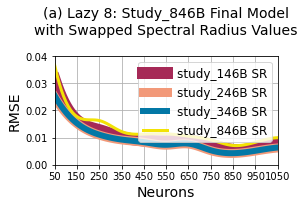

In [871]:
#add to plot
plt.figure(figsize=(4, 2))
changeWidth = 12
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo16.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth - 3

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Lazy 8: Study_846B Final Model\nwith Swapped Spectral Radius Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.04])
plt.grid()
plt.show()

In [872]:
plotInfo16TimeTrain

study_146B SR  study_246B SR  study_346B SR  study_846B SR
0        0.059443       0.058146       0.072837       0.070042
1        0.093177       0.102601       0.138746       0.158928
2        0.158773       0.157534       0.216499       0.221001
3        0.185761       0.229856       0.319371       0.294479
4        0.270997       0.332039       0.508827       0.483776
5        0.416205       0.518724       0.725240       0.705769
6        0.609152       0.703752       0.923370       0.891092
7        0.780762       0.976588       1.232132       1.129842
8        0.976201       1.268772       1.447233       1.457007
9        1.263499       1.686233       1.821984       1.800730
10       1.486289       2.188953       2.339573       2.119647

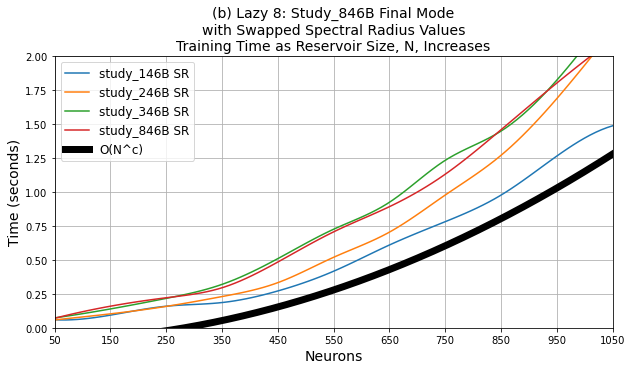

In [873]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo16TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8: Study_846B Final Mode\nwith Swapped Spectral Radius Values\nTraining Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

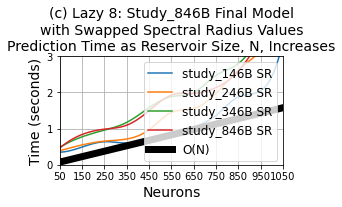

In [874]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo16TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0015*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_846B Final Model\nwith Swapped Spectral Radius Values\nPrediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [875]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo17= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo17TimeTrain = pd.DataFrame()
plotInfo17TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    a = studies.iloc[i,2].params['a']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo17 =            pd.concat((plotInfo17, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo17TimeTrain =   pd.concat((plotInfo17TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo17TimePredict = pd.concat((plotInfo17TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_146B
0.07339738210042318
0.15490560872214182
0.24325355461665563
0.3177891731262207
0.4469303534581111
0.7272702285221645
0.9479445219039917
1.1726280791418893
1.494182825088501
1.8163056884493147
2.4826138700757707
study_246B
0.08431814267085148
0.1932688309596135
0.2641102245875767
0.3828789506639753
0.5530340841838292
0.9266919408525739
1.0897165877478463
1.092697262763977
1.4360534826914468
1.7493828705378942
2.441537550517491
study_346B
0.08095128719623272
0.1822195223399571
0.24236275468553817
0.33918780939919607
0.513333763395037
0.778761625289917
0.9974216222763062
1.2755041122436523
1.5297191301981607
2.0081329686301097
2.4718739986419678
study_846B
0.07735163824898857
0.1675372804914202
0.2636531670888265
0.31552089963640484
0.5000227178846087
0.8336172103881836
1.0947269712175642
1.3133209432874406
1.6959719022115072
2.0470982108797346
2.502401896885463


In [876]:
plotInfo17 =            plotInfo17.rename(columns={"0": "study_146B LR", "1": "study_246B LR", "2": "study_346B LR", "3": "study_846B LR"})
plotInfo17TimeTrain =   plotInfo17TimeTrain.rename(columns={"0": "study_146B LR", "1": "study_246B LR", "2": "study_346B LR", "3": "study_846B LR"})
plotInfo17TimePredict = plotInfo17TimePredict.rename(columns={"0": "study_146B LR", "1": "study_246B LR", "2": "study_346B LR", "3": "study_846B LR"})

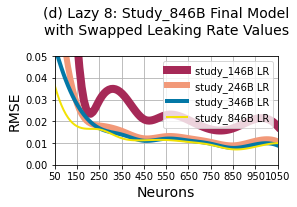

In [877]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo17.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo17.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo17.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend()
plt.xlim([50,1050])
plt.title('(d) Lazy 8: Study_846B Final Model\nwith Swapped Leaking Rate Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.05])
plt.grid()
plt.show()

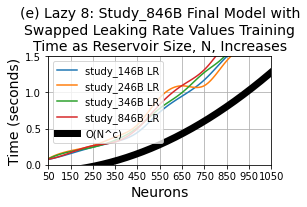

In [878]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo17TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo17TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo17TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Lazy 8: Study_846B Final Model with\nSwapped Leaking Rate Values Training\nTime as Reservoir Size, N, Increases', fontsize=14)
plt.show()

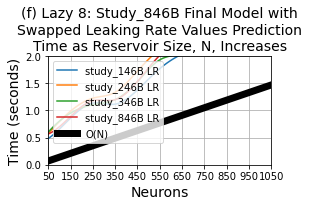

In [879]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo17TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo17TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo17TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0014*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8: Study_846B Final Model with\nSwapped Leaking Rate Values Prediction\nTime as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [880]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo18= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo18TimeTrain = pd.DataFrame()
plotInfo18TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo18 =            pd.concat((plotInfo18, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo18TimeTrain =   pd.concat((plotInfo18TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo18TimePredict = pd.concat((plotInfo18TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_146B
study_246B
study_346B
study_846B


In [881]:
plotInfo18 =            plotInfo18.rename(columns={"0": "study_146B dW", "1": "study_246B dW", "2": "study_346B dW", "3": "study_846B dW"})
plotInfo18TimeTrain =   plotInfo18TimeTrain.rename(columns={"0": "study_146B dW", "1": "study_246B dW", "2": "study_346B dW", "3": "study_846B dW"})
plotInfo18TimePredict = plotInfo18TimePredict.rename(columns={"0": "study_146B dW", "1": "study_246B dW", "2": "study_346B dW", "3": "study_846B dW"})

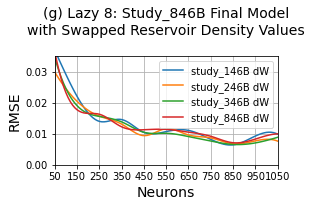

In [882]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo18.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo18.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo18.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.title('(g) Lazy 8: Study_846B Final Model\nwith Swapped Reservoir Density Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.035])
plt.grid()
plt.show()

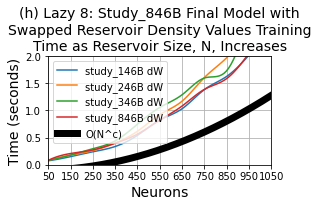

In [883]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo18TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo18TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo18TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Lazy 8: Study_846B Final Model with\nSwapped Reservoir Density Values Training\nTime as Reservoir Size, N, Increases', fontsize=14)
plt.show()

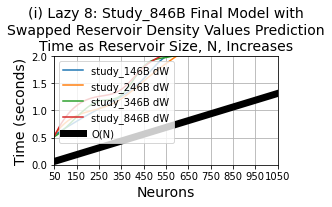

In [884]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo18TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo18TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo18TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00125*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Lazy 8: Study_846B Final Model with\nSwapped Reservoir Density Values Prediction\nTime as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Wfb

In [885]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo44= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo44TimeTrain = pd.DataFrame()
plotInfo44TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dfb = studies.iloc[i,2].params['dfb']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo44 =            pd.concat((plotInfo44, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo44TimeTrain =   pd.concat((plotInfo44TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo44TimePredict = pd.concat((plotInfo44TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_146B
study_246B
study_346B
study_846B


In [886]:
plotInfo44 =            plotInfo44.rename(columns={"0": "study_146B dfb", "1": "study_246B dfb", "2": "study_346B dfb", "3": "study_846B dfb"})
plotInfo44TimeTrain =   plotInfo44TimeTrain.rename(columns={"0": "study_146B dfb", "1": "study_246B dfb", "2": "study_346B dfb", "3": "study_846B dfb"})
plotInfo44TimePredict = plotInfo44TimePredict.rename(columns={"0": "study_146B dfb", "1": "study_246B dfb", "2": "study_346B dfb", "3": "study_846B dfb"})

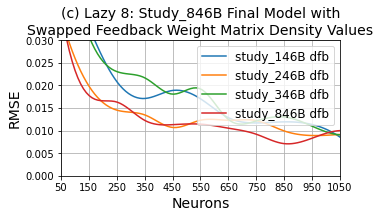

In [887]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo44.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo44.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo44.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) Lazy 8: Study_846B Final Model with\nSwapped Feedback Weight Matrix Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.03])
plt.grid()
plt.show()

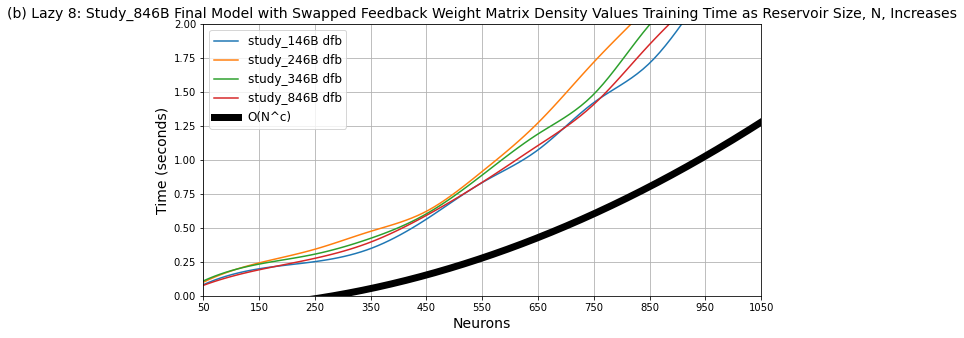

In [888]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo44TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo44TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo44TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8: Study_846B Final Model with Swapped Feedback Weight Matrix Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

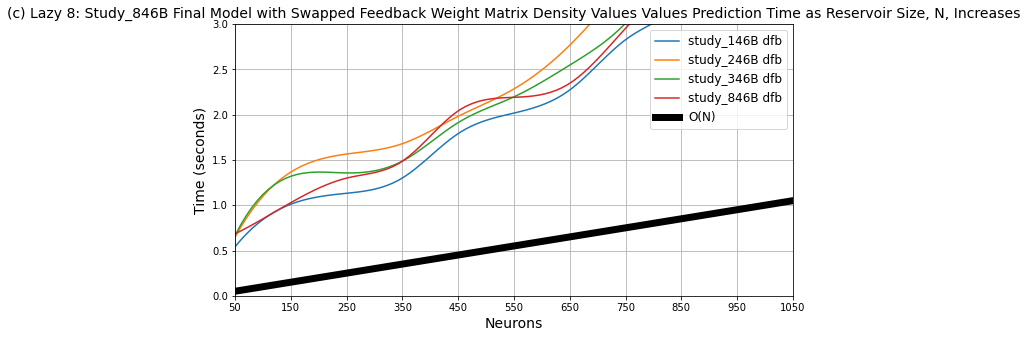

In [889]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo44TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo44TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo44TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_846B Final Model with Swapped Feedback Weight Matrix Density Values Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [890]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo19= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo19TimeTrain = pd.DataFrame()
plotInfo19TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo19 =            pd.concat((plotInfo19, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo19TimeTrain =   pd.concat((plotInfo19TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo19TimePredict = pd.concat((plotInfo19TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_146B
study_246B
study_346B
study_846B


In [891]:
plotInfo19 =            plotInfo19.rename(columns={"0": "study_146B dWin", "1": "study_246B dWin", "2": "study_346B dWin", "3": "study_846B dWin"})
plotInfo19TimeTrain =   plotInfo19TimeTrain.rename(columns={"0": "study_146B dWin", "1": "study_246B dWin", "2": "study_346B dWin", "3": "study_846B dWin"})
plotInfo19TimePredict = plotInfo19TimePredict.rename(columns={"0": "study_146B dWin", "1": "study_246B dWin", "2": "study_346B dWin", "3": "study_846B dWin"})

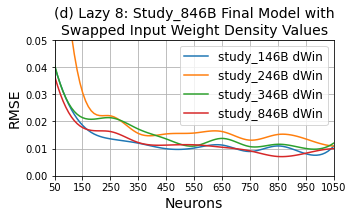

In [892]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo19.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo19.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo19.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Lazy 8: Study_846B Final Model with\nSwapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.05])
plt.grid()
plt.show()

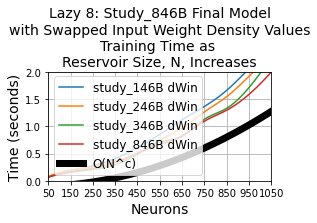

In [893]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo19TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo19TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo19TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_846B Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

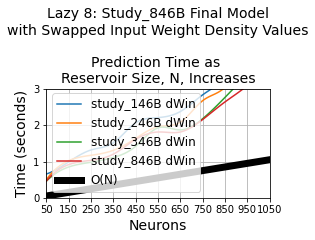

In [894]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo19TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo19TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo19TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_846B Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [895]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo20= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo20TimeTrain = pd.DataFrame()
plotInfo20TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]

    
    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo20 =            pd.concat((plotInfo20, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo20TimeTrain =   pd.concat((plotInfo20TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo20TimePredict = pd.concat((plotInfo20TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_146B
study_246B
study_346B
study_846B


In [896]:
plotInfo20 =            plotInfo20.rename(columns={"0": "study_146B sin", "1": "study_246B sin", "2": "study_346B sin", "3": "study_846B sin"})
plotInfo20TimeTrain =   plotInfo20TimeTrain.rename(columns={"0": "study_146B sin", "1": "study_246B sin", "2": "study_346B sin", "3": "study_846B sin"})
plotInfo20TimePredict = plotInfo20TimePredict.rename(columns={"0": "study_146B sin", "1": "study_246B sin", "2": "study_346B sin", "3": "study_846B sin"})

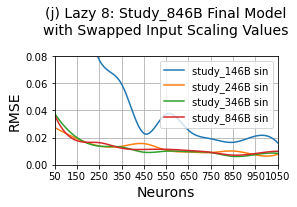

In [897]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo20.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo20.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo20.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.title('(j) Lazy 8: Study_846B Final Model\nwith Swapped Input Scaling Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.,0.08])
plt.grid()
plt.show()

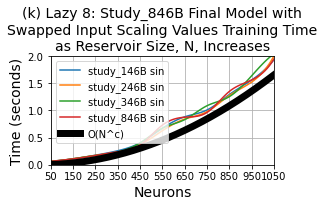

In [912]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo20TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo20TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo20TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(k) Lazy 8: Study_846B Final Model with\nSwapped Input Scaling Values Training Time\nas Reservoir Size, N, Increases', fontsize=14)
plt.show()

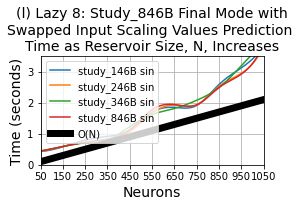

In [899]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo20TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo20TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo20TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.002*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,3.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) Lazy 8: Study_846B Final Mode with\nSwapped Input Scaling Values Prediction \nTime as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Feedback

In [900]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo45= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo45TimeTrain = pd.DataFrame()
plotInfo45TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]

    
    print(studies.iloc[i,0])
    sfb = studies.iloc[i,2].params['sfb']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo45 =            pd.concat((plotInfo45, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo45TimeTrain =   pd.concat((plotInfo45TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo45TimePredict = pd.concat((plotInfo45TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_146B
study_246B
study_346B
study_846B


In [901]:
plotInfo45 =            plotInfo45.rename(columns={"0": "study_146B sfb", "1": "study_246B sfb", "2": "study_346B sfb", "3": "study_846B sfb"})
plotInfo45TimeTrain =   plotInfo45TimeTrain.rename(columns={"0": "study_146B sfb", "1": "study_246B sfb", "2": "study_346B sfb", "3": "study_846B sfb"})
plotInfo45TimePredict = plotInfo45TimePredict.rename(columns={"0": "study_146B sfb", "1": "study_246B sfb", "2": "study_346B sfb", "3": "study_846B sfb"})

In [902]:
plotInfo45

study_146B sfb  study_246B sfb  study_346B sfb  study_846B sfb
0         0.035301        0.033643        0.036311        0.036791
1         0.014789        0.016107        0.017357        0.017759
2         0.015129        0.016252        0.016243        0.016291
3         0.014095        0.011551        0.011998        0.012242
4         0.012749        0.010727        0.011155        0.011288
5         0.011385        0.011354        0.011375        0.011403
6         0.011446        0.011382        0.010514        0.010514
7         0.014827        0.008899        0.009128        0.009177
8         0.050960        0.007035        0.007115        0.007100
9         0.008891        0.009063        0.008297        0.008294
10        0.009341        0.009748        0.009928        0.009976

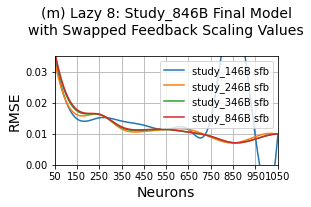

In [903]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo45.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo45.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo45.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.title('(m) Lazy 8: Study_846B Final Model\nwith Swapped Feedback Scaling Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.035])
plt.grid()
plt.show()

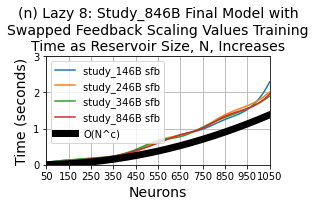

In [904]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo45TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo45TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo45TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(n) Lazy 8: Study_846B Final Model with\nSwapped Feedback Scaling Values Training\nTime as Reservoir Size, N, Increases', fontsize=14)
plt.show()

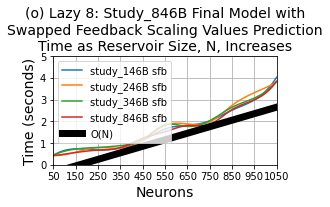

In [905]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo45TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo45TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo45TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.003*n)-0.5
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(o) Lazy 8: Study_846B Final Model with\nSwapped Feedback Scaling Values Prediction\nTime as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [906]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo21= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo21TimeTrain = pd.DataFrame()
plotInfo21TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo21 =            pd.concat((plotInfo21, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo21TimeTrain =   pd.concat((plotInfo21TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo21TimePredict = pd.concat((plotInfo21TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_146B
study_246B
study_346B
study_846B


In [907]:
plotInfo21 =            plotInfo21.rename(columns={"0": "study_146B Beta", "1": "study_246B Beta", "2": "study_346B Beta", "3": "study_846B Beta"})
plotInfo21TimeTrain =   plotInfo21TimeTrain.rename(columns={"0": "study_146B Beta", "1": "study_246B Beta", "2": "study_346B Beta", "3": "study_846B Beta"})
plotInfo21TimePredict = plotInfo21TimePredict.rename(columns={"0": "study_146B Beta", "1": "study_246B Beta", "2": "study_346B Beta", "3": "study_846B Beta"})

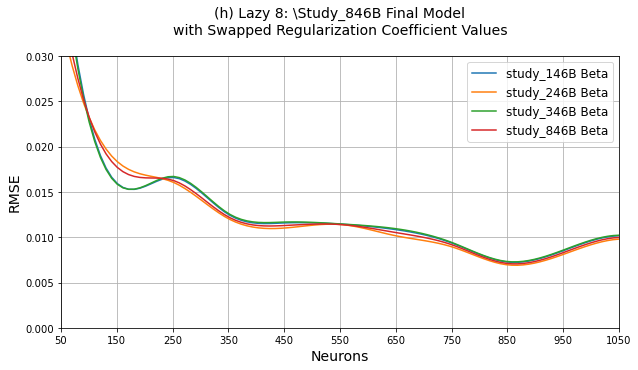

In [908]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo21.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo21.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo21.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(h) Lazy 8: \Study_846B Final Model\nwith Swapped Regularization Coefficient Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.03])
plt.grid()
plt.show()

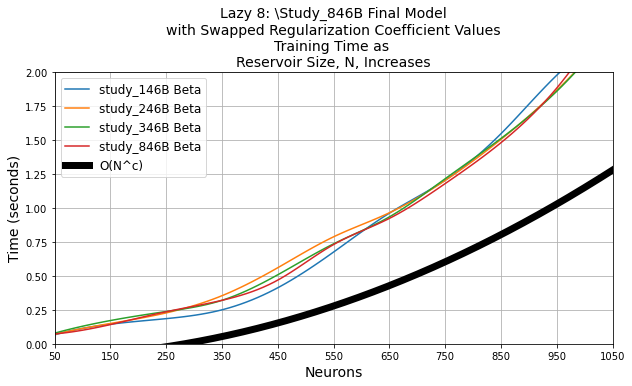

In [909]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo21TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo21TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo21TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: \Study_846B Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

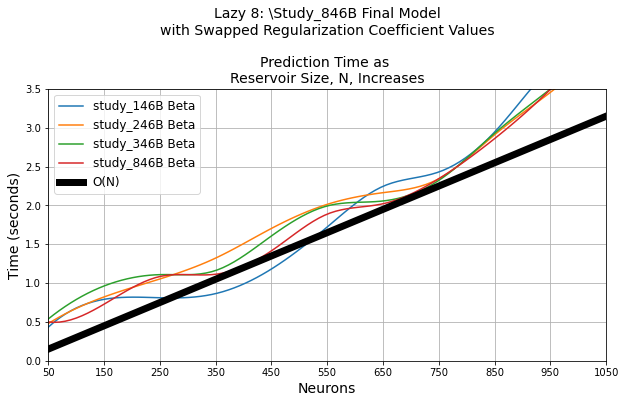

In [918]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo21TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo21TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo21TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.003*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: \Study_846B Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# What readout activation is best?

In [223]:
print(studies.loc[studies.iloc[:,0] == 'study_846A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_846A'].iloc[0,2].params

study_846A


{'p': 0.8501965562812667,
 'a': 0.02072373822805785,
 'dw': 0.10058738443731437,
 'dfb': 0.5938516780838764,
 'din': 0.24478433224604743,
 'sin': 0.791195465774344,
 'sfb': 1.3786047847785634,
 'B': 0.002401829829257553}

In [224]:
print(studies.loc[studies.iloc[:,0] == 'study_847A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_847A'].iloc[0,2].params

study_847A


{'p': 0.034709643388647224,
 'a': 0.19064936102606106,
 'dw': 0.10664767945852588,
 'dfb': 0.9092045147123381,
 'din': 0.48474560968486097,
 'sin': 1.043700503971127,
 'sfb': 1.5806586847671553,
 'B': 1.518683601601512}

## Models that scored very similar, but used different activation function

In [675]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo14 = pd.DataFrame()
plotInfo14TimeTrain = pd.DataFrame()
plotInfo14TimePredict = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        print(N)
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        print(seed)
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo14 = pd.concat((plotInfo14, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo14TimeTrain = pd.concat((plotInfo14TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo14TimePredict = pd.concat((plotInfo14TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

study_846A
50
100
150
100
250
100
350
100
450
100
550
100
650
100
750
100
850
100
950
100
1050
100
study_847A
50
100
150
100
250
100
350
100
450
100
550
100
650
100
750
100
850
100
950
100
1050
100


In [679]:
plotInfo14

study_846A  study_847A
0     0.018887    1.096177
1     0.012426    1.005780
2     0.010491    1.000126
3     0.011000    0.999985
4     0.010287    0.999930
5     0.007206    0.999823
6     0.010073    0.999870
7     0.006061    0.999884
8     0.007208    1.007788
9     0.006829    1.025920
10    0.006007    1.017843

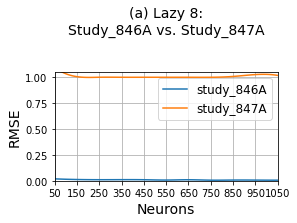

In [680]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Lazy 8:\nStudy_846A vs. Study_847A\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0,1.05])
plt.grid()
plt.show()

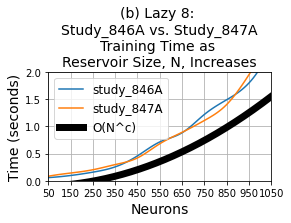

In [681]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8: \nStudy_846A vs. Study_847A\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

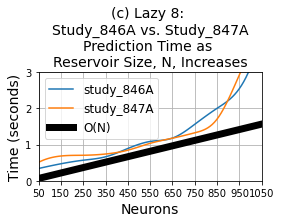

In [682]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0015*n)-0.01
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: \nStudy_846A vs. Study_847A\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## Same exact model with different activation function

In [229]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo15 = pd.DataFrame()
plotInfo15TimeTrain = pd.DataFrame()
plotInfo15TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
print('Parameters from ', str(studies.iloc[i,0]))
while(count < 2): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = count
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo15 = pd.concat((plotInfo15, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo15TimeTrain = pd.concat((plotInfo15TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo15TimePredict = pd.concat((plotInfo15TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

Parameters from  study_846A


In [230]:
plotInfo15 = plotInfo15.rename(columns={"0": "study_846A", "1": "study_847A"})
plotInfo15TimeTrain = plotInfo15TimeTrain.rename(columns={"0": "study_846A", "1": "study_847A"})
plotInfo15TimePredict = plotInfo15TimePredict.rename(columns={"0": "study_846A", "1": "study_847A"})

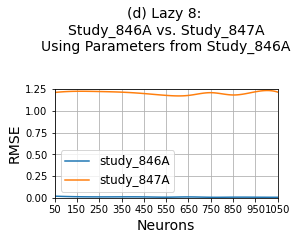

In [686]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Lazy 8: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_846A\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,1.25])
plt.grid()
plt.show()

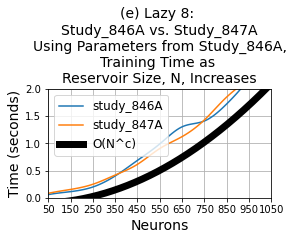

In [644]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000002*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Lazy 8: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_846A,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

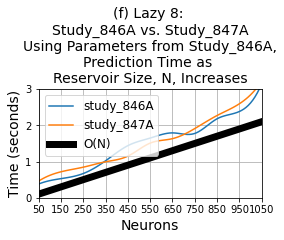

In [646]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.002*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_846A,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [662]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo46 = pd.DataFrame()
plotInfo46TimeTrain = pd.DataFrame()
plotInfo46TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
print('Parameters from ', str(studies.iloc[i,0]))
while(count < 2): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = count
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        print(N)
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        print(seed)
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo46 =            pd.concat((plotInfo46, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo46TimeTrain =   pd.concat((plotInfo46TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo46TimePredict = pd.concat((plotInfo46TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

Parameters from  study_846A
50
100
150
100
250
100
350
100
450
100
550
100
650
100
750
100
850
100
950
100
1050
100
50
100
150
100
250
100
350
100
450
100
550
100
650
100
750
100
850
100
950
100
1050
100


In [663]:
plotInfo46 = plotInfo46.rename(columns={"0": "study_846A", "1": "study_847A"})
plotInfo46TimeTrain = plotInfo46TimeTrain.rename(columns={"0": "study_846A", "1": "study_847A"})
plotInfo46TimePredict = plotInfo46TimePredict.rename(columns={"0": "study_846A", "1": "study_847A"})

In [664]:
plotInfo46

study_846A  study_847A
0     0.018887    1.210522
1     0.012426    1.224737
2     0.010491    1.221889
3     0.011000    1.214643
4     0.010287    1.198748
5     0.007206    1.177519
6     0.010073    1.177132
7     0.006061    1.208792
8     0.007208    1.182127
9     0.006829    1.218916
10    0.006007    1.215200

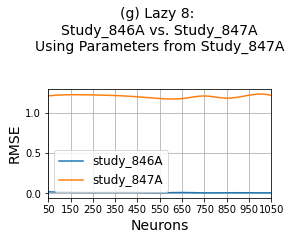

In [665]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo46.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo46.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo46.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(g) Lazy 8: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_847A\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
#plt.ylim([0.01,0.08])
plt.grid()
plt.show()

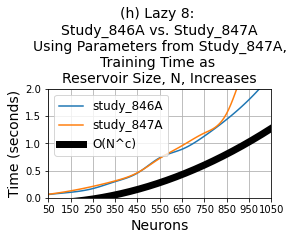

In [666]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo46TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo46TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo46TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Lazy 8: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_847A,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

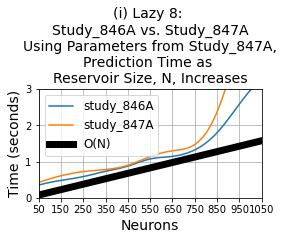

In [691]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo46TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo46TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo46TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0015*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Lazy 8: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_847A,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## What parameters influence the function of readout activation?

### spectral radius

In [239]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo47= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo47TimeTrain = pd.DataFrame()
plotInfo47TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo47 =            pd.concat((plotInfo47, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo47TimeTrain =   pd.concat((plotInfo47TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo47TimePredict = pd.concat((plotInfo47TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_846A
study_847A


In [240]:
plotInfo47 =            plotInfo47.rename(columns={"0": "study_846A SR", "1": "study_847A SR"})
plotInfo47TimeTrain =   plotInfo47TimeTrain.rename(columns={"0": "study_846A SR", "1": "study_847A SR"})
plotInfo47TimePredict = plotInfo47TimePredict.rename(columns={"0": "study_846A SR", "1": "study_847A SR"})

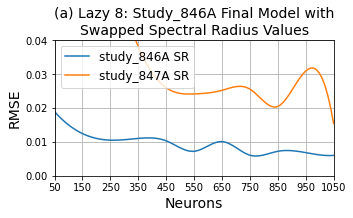

In [757]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo47.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo47.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo47.columns[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Lazy 8: Study_846A Final Model with\nSwapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.04])
plt.grid()
plt.show()

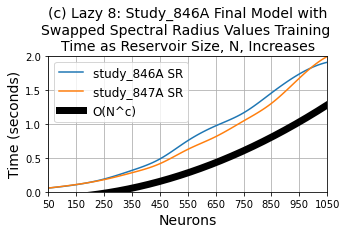

In [763]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo47TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo47TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo47TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(c) Lazy 8: Study_846A Final Model with\nSwapped Spectral Radius Values Training \nTime as Reservoir Size, N, Increases', fontsize=14)
plt.show()

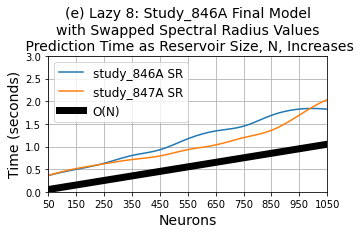

In [767]:
##### add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo47TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo47TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo47TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(e) Lazy 8: Study_846A Final Model\nwith Swapped Spectral Radius Values\n Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [244]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo48 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo48TimeTrain = pd.DataFrame()
plotInfo48TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
    
    print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    N=50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo48 =            pd.concat((plotInfo48, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo48TimeTrain =   pd.concat((plotInfo48TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo48TimePredict = pd.concat((plotInfo48TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_846A
0.05707785061427525
0.1117704084941319
0.19254295642559344
0.2972999572753906
0.43772039413452146
0.6737990379333496
0.889549748102824
1.123167634010315
1.4965632120768229
1.7465589897973197
2.1706393446241106
study_847A
0.06171269416809082
0.11906027793884277
0.19206115177699498
0.3244087855021159
0.44538865770612446
0.6981921877179827
0.8688085930688041
1.0912044525146485
1.3633653004964192
1.6263771533966065
1.9954800605773926


In [245]:
plotInfo48 =            plotInfo48.rename(columns={"0": "study_846A LR", "1": "study_847A LR"})
plotInfo48TimeTrain =   plotInfo48TimeTrain.rename(columns={"0": "study_846A LR", "1": "study_847A LR"})
plotInfo48TimePredict = plotInfo48TimePredict.rename(columns={"0": "study_846A LR", "1": "study_847A LR"})

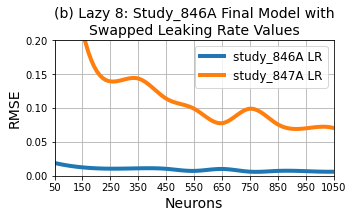

In [756]:
#add to plot
plt.figure(figsize=(5, 2.5))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo48.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo48.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo48.columns[col], linewidth=4)
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(b) Lazy 8: Study_846A Final Model with\nSwapped Leaking Rate Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.2])
plt.grid()
plt.show()

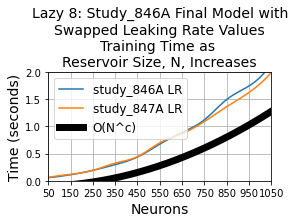

In [709]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo48TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo48TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo48TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_846A Final Model with\nSwapped Leaking Rate Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

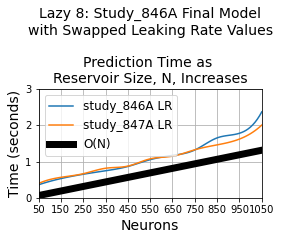

In [713]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo48TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo48TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo48TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00125*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_846A Final Model\nwith Swapped Leaking Rate Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [249]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo49= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo49TimeTrain = pd.DataFrame()
plotInfo49TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
    
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo49 =            pd.concat((plotInfo49, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo49TimeTrain =   pd.concat((plotInfo49TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo49TimePredict = pd.concat((plotInfo49TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_846A
study_847A


In [250]:
plotInfo49 =            plotInfo49.rename(columns={"0": "study_846A dW", "1": "study_847A dW"})
plotInfo49TimeTrain =   plotInfo49TimeTrain.rename(columns={"0": "study_846A dW", "1": "study_847A dW"})
plotInfo49TimePredict = plotInfo49TimePredict.rename(columns={"0": "study_846A dW", "1": "study_847A dW"})

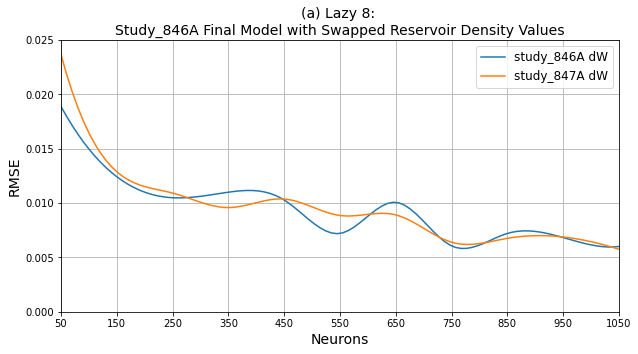

In [714]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo49.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo49.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo49.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Lazy 8: \nStudy_846A Final Model with Swapped Reservoir Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.025])
plt.grid()
plt.show()

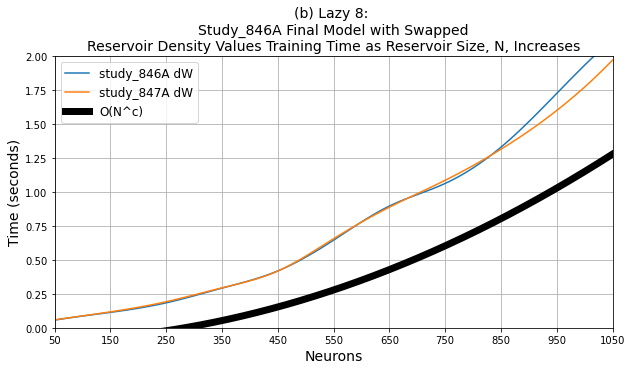

In [252]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo49TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo49TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo49TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Lazy 8: \nStudy_846A Final Model with Swapped\nReservoir Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

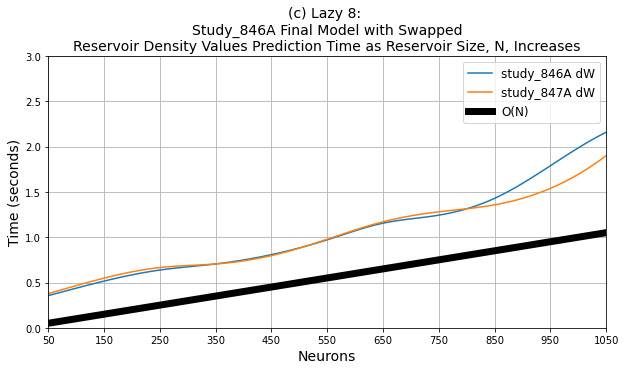

In [717]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo49TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo49TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo49TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: \nStudy_846A Final Model with Swapped\nReservoir Density Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Wfb

In [775]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo50= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo50TimeTrain = pd.DataFrame()
plotInfo50TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dfb = studies.iloc[i,2].params['dfb']
    print(dfb)
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo50 =            pd.concat((plotInfo50, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo50TimeTrain =   pd.concat((plotInfo50TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo50TimePredict = pd.concat((plotInfo50TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_846A
0.5938516780838764
study_847A
0.9092045147123381


In [776]:
plotInfo50 =            plotInfo50.rename(columns={"0": "study_846A dfb", "1": "study_847A dfb"})
plotInfo50TimeTrain =   plotInfo50TimeTrain.rename(columns={"0": "study_846A dfb", "1": "study_847A dfb"})
plotInfo50TimePredict = plotInfo50TimePredict.rename(columns={"0": "study_846A dfb", "1": "study_847A dfb"})

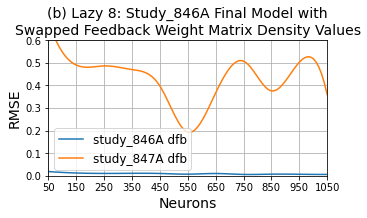

In [777]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo50.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo50.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo50.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(b) Lazy 8: Study_846A Final Model with\nSwapped Feedback Weight Matrix Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0,0.6])
plt.grid()
plt.show()

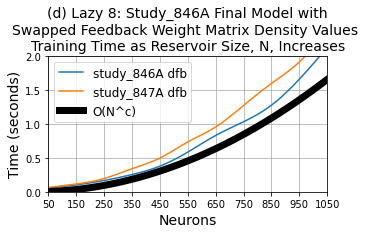

In [778]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo50TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo50TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo50TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(d) Lazy 8: Study_846A Final Model with\nSwapped Feedback Weight Matrix Density Values \nTraining Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

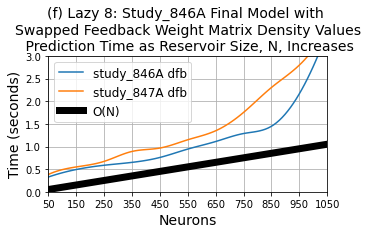

In [779]:
##### add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo50TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo50TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo50TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8: Study_846A Final Model with \nSwapped Feedback Weight Matrix Density Values\n Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [259]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo51= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo51TimeTrain = pd.DataFrame()
plotInfo51TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo51 =            pd.concat((plotInfo51, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo51TimeTrain =   pd.concat((plotInfo51TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo51TimePredict = pd.concat((plotInfo51TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_846A
study_847A


In [260]:
plotInfo51 =            plotInfo51.rename(columns={"0": "study_846A dWin", "1": "study_847A dWin"})
plotInfo51TimeTrain =   plotInfo51TimeTrain.rename(columns={"0": "study_846A dWin", "1": "study_847A dWin"})
plotInfo51TimePredict = plotInfo51TimePredict.rename(columns={"0": "study_846A dWin", "1": "study_847A dWin"})

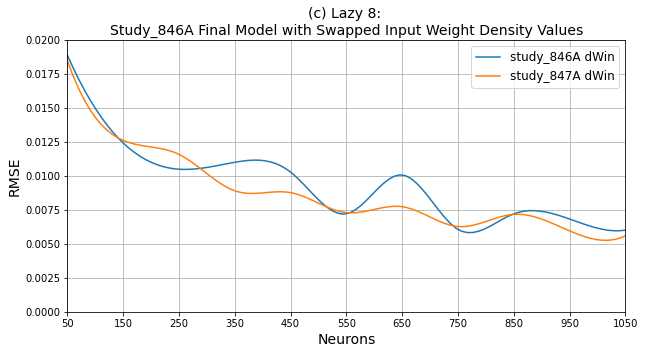

In [730]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo51.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo51.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo51.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) Lazy 8: \nStudy_846A Final Model with Swapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.02])
plt.grid()
plt.show()

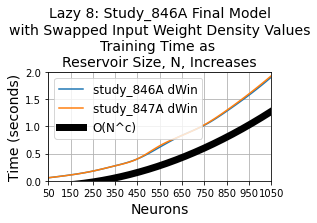

In [262]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo51TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo51TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo51TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_846A Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

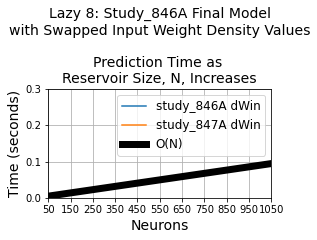

In [263]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo51TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo51TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo51TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_846A Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [264]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo52= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo52TimeTrain = pd.DataFrame()
plotInfo52TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]

    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo52 =            pd.concat((plotInfo52, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo52TimeTrain =   pd.concat((plotInfo52TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo52TimePredict = pd.concat((plotInfo52TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_846A
study_847A


In [265]:
plotInfo52 =            plotInfo52.rename(columns={"0": "study_846A sin", "1": "study_847A sin"})
plotInfo52TimeTrain =   plotInfo52TimeTrain.rename(columns={"0": "study_846A sin", "1": "study_847A sin"})
plotInfo52TimePredict = plotInfo52TimePredict.rename(columns={"0": "study_846A sin", "1": "study_847A sin"})

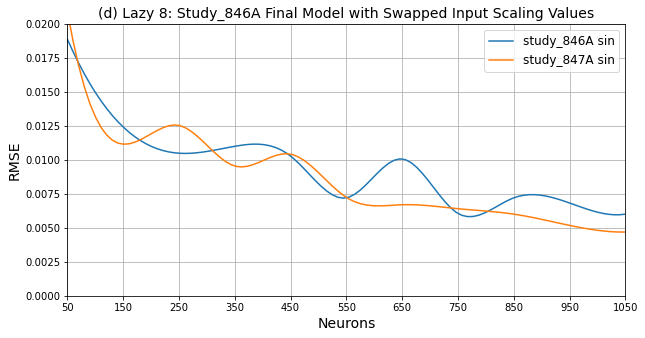

In [742]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo52.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo52.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo52.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Lazy 8: Study_846A Final Model with Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0,0.02])
plt.grid()
plt.show()

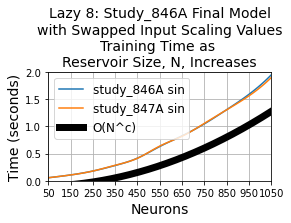

In [267]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo52TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo52TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo52TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_846A Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

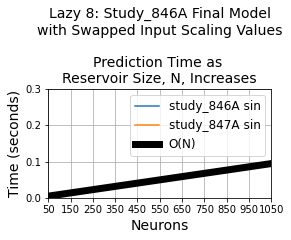

In [268]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo52TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo52TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo52TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_846A Final Model\nwith Swapped Input Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Feedback

In [269]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo53= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo53TimeTrain = pd.DataFrame()
plotInfo53TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
    
    print(studies.iloc[i,0])
    sfb = studies.iloc[i,2].params['sfb']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo53 =            pd.concat((plotInfo53, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo53TimeTrain =   pd.concat((plotInfo53TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo53TimePredict = pd.concat((plotInfo53TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_846A
study_847A


In [270]:
plotInfo53 =            plotInfo53.rename(columns={"0": "study_846A sfb", "1": "study_847A sfb"})
plotInfo53TimeTrain =   plotInfo53TimeTrain.rename(columns={"0": "study_846A sfb", "1": "study_847A sfb"})
plotInfo53TimePredict = plotInfo53TimePredict.rename(columns={"0": "study_846A sfb", "1": "study_847A sfb"})

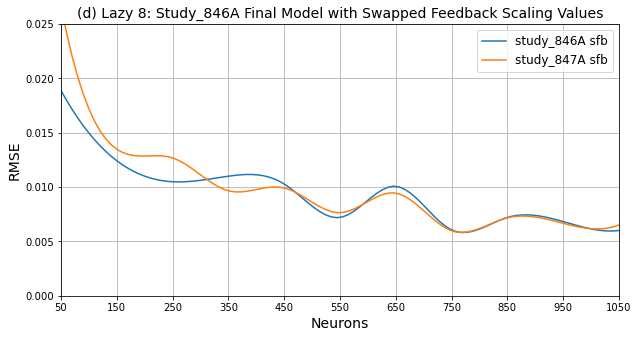

In [743]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo53.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo53.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo53.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Lazy 8: Study_846A Final Model with Swapped Feedback Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.0,0.025])
plt.grid()
plt.show()

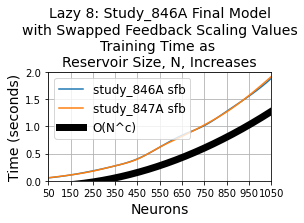

In [272]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo53TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo53TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo53TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_846A Final Model\nwith Swapped Feedback Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

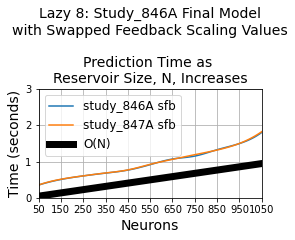

In [746]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo53TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo53TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo53TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_846A Final Model\nwith Swapped Feedback Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [274]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo54= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo54TimeTrain = pd.DataFrame()
plotInfo54TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
dfb = studies.iloc[i,2].params['dfb']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo54 =            pd.concat((plotInfo54, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo54TimeTrain =   pd.concat((plotInfo54TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo54TimePredict = pd.concat((plotInfo54TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_846A
study_847A


In [275]:
plotInfo54 =            plotInfo54.rename(columns={"0": "study_846A Beta", "1": "study_847A Beta"})
plotInfo54TimeTrain =   plotInfo54TimeTrain.rename(columns={"0": "study_846A Beta", "1": "study_847A Beta"})
plotInfo54TimePredict = plotInfo54TimePredict.rename(columns={"0": "study_846A Beta", "1": "study_847A Beta"})

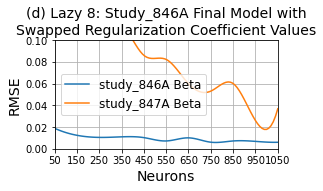

In [752]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo54.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo54.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo54.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Lazy 8: Study_846A Final Model with\nSwapped Regularization Coefficient Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0,0.1])
plt.grid()
plt.show()

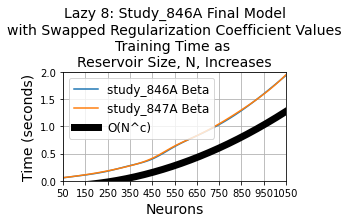

In [277]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo54TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo54TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo54TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Study_846A Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

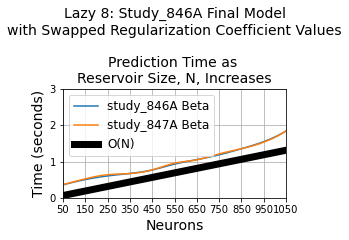

In [755]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo54TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo54TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo54TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00125*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Lazy 8: Study_846A Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()